# **Import library and Load data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pymongo as pm
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 15.7 MB/s eta 0:00:00


In [ ]:

uri = "mongodb+srv://svbk:<pass>@cluster0.h5ef7.mongodb.net/?retryWrites=true&w=majority&appName=Cluster0" #change password to access to the database
client = MongoClient(uri, server_api = ServerApi('1'))
db = client['VietNameseRealEstateData']
collection = db['Final_Real_Estate']
final_data = list(collection.find())
df = pd.DataFrame(final_data)

# **Data Inspection**

## **Understand the Data**

In [ ]:
# Example data

df.head(10)

,_id,Thành phố,Diện tích,Đường trước nhà,Mặt tiền,Số tầng,Số toilet,Số phòng ngủ,Loại,Hướng,Mức giá
0,67483abea2187cd9d8089599,hà nội,48.0,3.0,5.0,4.0,3.0,3.0,N,NaN,5.70
1,67483abea2187cd9d808959a,hà nội,55.0,3.0,5.0,4.0,3.0,3.0,N,NaN,6.60
2,67483abea2187cd9d808959b,hà nội,44.0,3.0,4.0,4.0,3.0,3.0,N,NaN,5.70
3,67483abea2187cd9d808959c,hà nội,55.0,NaN,NaN,NaN,NaN,NaN,N,NaN,6.20
4,67483abea2187cd9d808959d,hà nội,56.0,3.0,4.0,4.0,3.0,3.0,N,NaN,6.20
5,67483abea2187cd9d808959e,hà nội,54.0,3.0,4.0,3.0,2.0,3.0,N,NaN,6.30
6,67483abea2187cd9d808959f,hà nội,51.0,3.0,5.0,4.0,3.0,3.0,N,NaN,6.10
7,67483abea2187cd9d80895a0,long an,32.0,NaN,5.0,1.0,2.0,2.0,N,NaN,21.92
8,67483abea2187cd9d80895a1,lâm đồng,299.0,3.0,5.0,1.0,2.0,2.0,N,Đ,2.00
9,67483abea2187cd9d80895a2,lâm đồng,99.0,4.0,6.0,1.0,2.0,2.0,N,B,1.60


The first 10 records of the dataset, this is an example of our data.

In [ ]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (13728, 11)


The dataset dimension is (13728, 11), which means that it has 13728 rows and 11 columns.

In [ ]:
# Dataset information

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13728 entries, 0 to 13727
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              13728 non-null  object 
 1   Thành phố        13719 non-null  object 
 2   Diện tích        13711 non-null  float64
 3   Đường trước nhà  5793 non-null   float64
 4   Mặt tiền         7004 non-null   float64
 5   Số tầng          5907 non-null   float64
 6   Số toilet        8386 non-null   float64
 7   Số phòng ngủ     9127 non-null   float64
 8   Loại             13728 non-null  object 
 9   Hướng            4740 non-null   object 
 10  Mức giá          12427 non-null  float64
dtypes: float64(7), object(4)
memory usage: 1.2+ MB
None


As you can see from the data information, the dataset contains 11 columns describing various attributes of properties:

1. **_id**: Unique identifier for each property (object).
2. **Thành phố**: City where the property is located (object).
3. **Diện tích**: Area of the property (float64).
4. **Đường trước nhà**: Width of the road in front of the property (float64, many missing values).
5. **Mặt tiền**: Front width of the property (float64).
6. **Số tầng**: Number of floors (float64, many missing values).
7. **Số toilet**: Number of toilets (float64, partially missing).
8. **Số phòng ngủ**: Number of bedrooms (float64, partially missing).
9. **Loại**: Type of property (object, categorical).
10. **Hướng**: Direction the property faces (object, categorical, many missing values).
11. **Mức giá**: Price of the property (float64, target variable).

**Notes**:
- There are missing values in several columns, particularly in **Đường trước nhà, Số tầng** and **Hướng.**
- The dataset includes both numerical and categorical features, with **Mức giá** serving as the target variable.


In [ ]:
# Statistical summary for numerical features

pd.options.display.float_format = '{:.2f}'.format

df_numeric = df.select_dtypes(include=['number'])
df_filtered = df_numeric[df_numeric > 0]

print(df_filtered.describe())

       Diện tích  Đường trước nhà  Mặt tiền  Số tầng  Số toilet  Số phòng ngủ  \
count   13709.00          5793.00   7004.00  5907.00    8386.00       9127.00   
mean      349.67            11.01     10.33     3.82       3.30          3.65   
std      6730.25            14.89    130.96     1.81       3.77          3.90   
min         1.00             1.00      1.00     1.00       1.00          1.00   
25%        54.00             4.00      4.00     3.00       2.00          2.00   
50%        77.00             7.00      5.00     4.00       2.00          3.00   
75%       116.00            13.00      7.00     5.00       4.00          4.00   
max    650000.00           600.00  10765.00    18.00     100.00        100.00   

       Mức giá  
count 12427.00  
mean     13.06  
std      40.00  
min       0.13  
25%       3.80  
50%       6.20  
75%      11.50  
max    1942.50  


This table provides an overview of the numerical features in the house price dataset:

1. **Counts**:
   - Indicates the number of non-missing values for each column.
   - Example: "Diện tích" has 13,709 entries, while "Số tầng" has only 5,907, suggesting missing data.

2. **Mean (Average)**:
   - Reflects the central tendency of each feature.
   - Example: Average **Diện tích** (area) is 349.67, and average **Mức giá** (price) is 12.80.

3. **Standard Deviation (std)**:
   - Shows the variability in the data.
   - Example: **Diện tích** has a standard deviation of 6,730.25, and **Mức giá** has 35.44, indicating high variation or potential outliers.

4. **Min and Max**:
   - Display the range of values.
   - Example: **Diện tích** ranges from 1 to 650,000, and **Mặt tiền** ranges up to 10,765, suggesting potential outliers.

5. **Percentiles (25%, 50%, 75%)**:
   - Show the distribution of values.
   - Example: The median **Mức giá** (50%) is 6.20, which is lower than the mean (12.80), indicating a right-skewed distribution for prices.

### Key Observations:
- **Missing Data**: Significant in some columns (e.g., **Đường trước nhà**, **Số tầng**).
- **Outliers**: Likely present in features like **Diện tích**, **Mặt tiền**, **Số phòng ngủ**, and **Mức giá**.
- **Data Preprocessing**: Features have varying scales and distributions, requiring steps like normalization or missing value imputation.


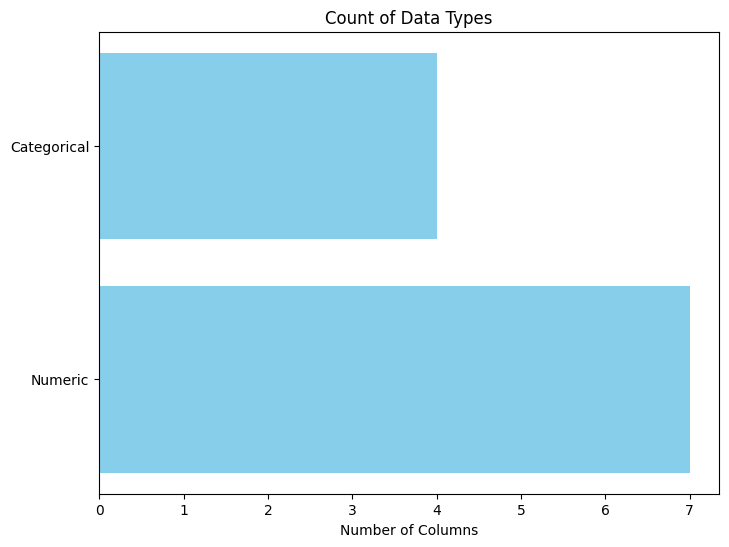

In [ ]:
# Visualize column types

numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

column_type_count = {'Numeric': len(numeric_columns), 'Categorical': len(categorical_columns)}

plt.figure(figsize=(8, 6))
plt.barh(list(column_type_count.keys()), list(column_type_count.values()), color='skyblue')
plt.title("Count of Data Types")
plt.xlabel("Number of Columns")
plt.show()


## **Checking Missing Value**

In [ ]:
# Checking Null values

print("Number of missing values for each column: ")
df.isnull().sum()

Number of missing values for each column: 


,0
_id,0
Thành phố,9
Diện tích,17
Đường trước nhà,7935
Mặt tiền,6724
Số tầng,7821
Số toilet,5342
Số phòng ngủ,4601
Loại,0
Hướng,8988


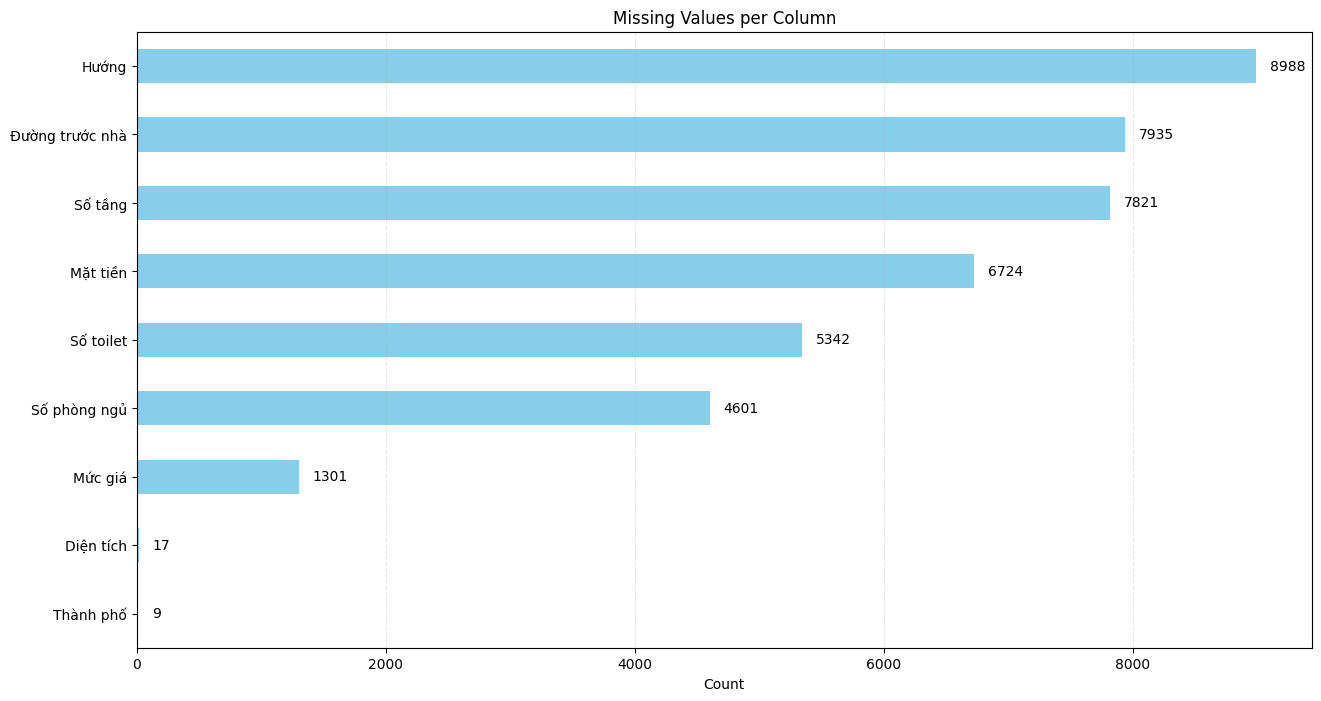

In [ ]:
# Visualize missing value

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=True)

if not missing_values.empty:
    ax = missing_values.plot(kind='barh', color='skyblue', figsize=(10, 8))
    plt.title("Missing Values per Column")
    plt.xlabel("Count")

    plt.subplots_adjust(right=1.3)

    for p in ax.patches:
        ax.annotate(f'{p.get_width()}',
                    (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),
                    xytext=(10, 0),
                    textcoords='offset points',
                    ha='left', va='center')

    plt.grid(axis='x', linestyle='--', alpha=0.3)

    plt.show()
else:
    print("No missing values found.")

The chart illustrates the distribution of missing values across the columns in the dataset. Key columns like Hướng (8,988 missing values), Đường trước nhà (7,935 missing), and Số tầng (7,821 missing) have a significant amount of incomplete data, indicating potential challenges in utilizing these features effectively. Columns like Số toilet and Số phòng ngủ also show moderate missing data, with over 4,000 entries missing in each. These gaps may require careful imputation or exclusion strategies to prevent bias in the analysis.

On the other hand, some columns, such as Diện tích (17 missing values) and Thành phố (9 missing values), have minimal missing data, making them reliable for predictive modeling. The target variable, Mức giá, has 1,341 missing values, which is notable since it directly impacts the training process. Addressing this issue is crucial to avoid model performance degradation.

Overall, while the dataset provides a solid foundation, handling missing values appropriately will be essential for accurate and robust modeling.

In [ ]:
# Calculate the missing percentage for each column

missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

print("Missing Percentage for Each Column(%):")
print(missing_percentage)

Missing Percentage for Each Column(%):
Hướng             65.47
Đường trước nhà   57.80
Số tầng           56.97
Mặt tiền          48.98
Số toilet         38.91
Số phòng ngủ      33.52
Mức giá            9.48
Diện tích          0.12
Thành phố          0.07
dtype: float64


<ipython-input-3-916359963670>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_percentage_by_type = df.groupby('Loại').apply(lambda x: x.isnull().mean() * 100)


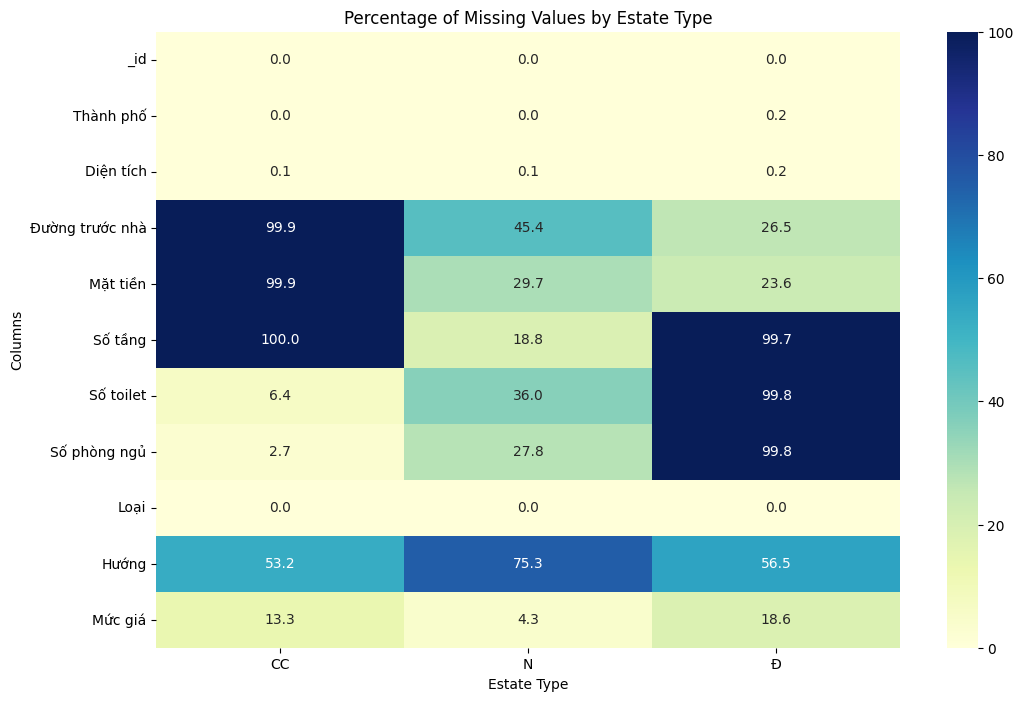

In [ ]:
# Calculate the percentage of missing values by House Type

missing_percentage_by_type = df.groupby('Loại').apply(lambda x: x.isnull().mean() * 100)
missing_percentage_by_type = missing_percentage_by_type.T  # Transpose to match the desired orientation

plt.figure(figsize=(12, 8))
sns.heatmap(missing_percentage_by_type, annot=True, cmap="YlGnBu", fmt=".1f")

plt.title("Percentage of Missing Values by Estate Type")
plt.ylabel("Columns")
plt.xlabel("Estate Type")

plt.show()

The heatmap above shows the percentage of missing values by house type. We can see that in **Apartments** type, there are significant missing values in **Đường trước nhà, Mặt tiền and Số tầng** (Nearly 100%) since these attributes do not exist for Apartments. Similarly, it is clear that there is no attributes **Số tầng, Số phòng ngủ and Số toilet** for **Land** type. Finally, the percentage of missing values in **Houses** type is moderate, fluctuate between 20% to 45%, except in **Direction**, when it increases considerably to 75.3%.

# **Exploratory Data Analytics**



```
# This is formatted as code
```

## **Single Numerical Feature Analysis**

### Histplot for `Mức giá`, `Diện tích`, `Đường trước nhà`, `Mặt tiền`

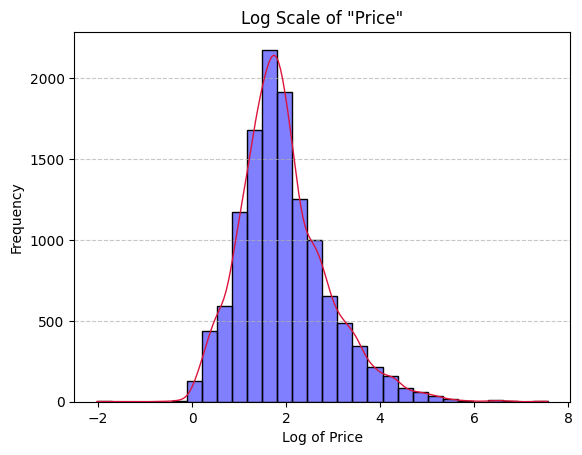

In [ ]:
# Histplot for log value of "Mức giá"

ax = sns.histplot(np.log(df['Mức giá']), kde=True, bins=30, color='blue', line_kws={'linewidth': 1})
ax.lines[0].set_color('crimson')

plt.title('Log Scale of "Price"')
plt.xlabel("Log of Price")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

House prices typically follow a right-skewed distribution due to a small number of very expensive properties. The log transformation has normalized the data, as seen in the bell-shaped curve. This normalization reduces the impact of extreme values (luxury homes) and allows better modeling of the typical housing market.

**Key Insights**
1. **Market Segmentation**:
   - Homes priced around the peak (log 2, real price 7,4 billion VND) dominate the dataset, indicating a **middle-market focus**. Models might perform better for predicting typical houses but could struggle with luxury outliers without special handling.

2. **Outlier Handling**:
   - Luxury homes (high-priced outliers) should be carefully treated. They can either be capped, removed, or modeled separately to prevent them from skewing predictions for mid-range homes.




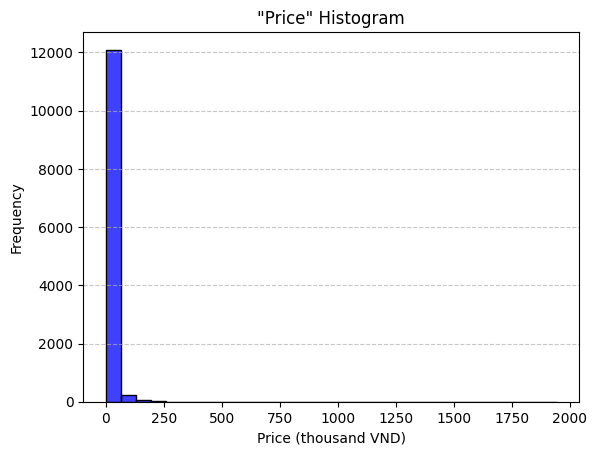

In [ ]:
ax = sns.histplot(df['Mức giá'], kde=False, bins=30, color='blue', line_kws={'linewidth': 1})
# ax.lines[0].set_color('crimson')

plt.title('"Price" Histogram')
plt.xlabel("Price (thousand VND)")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

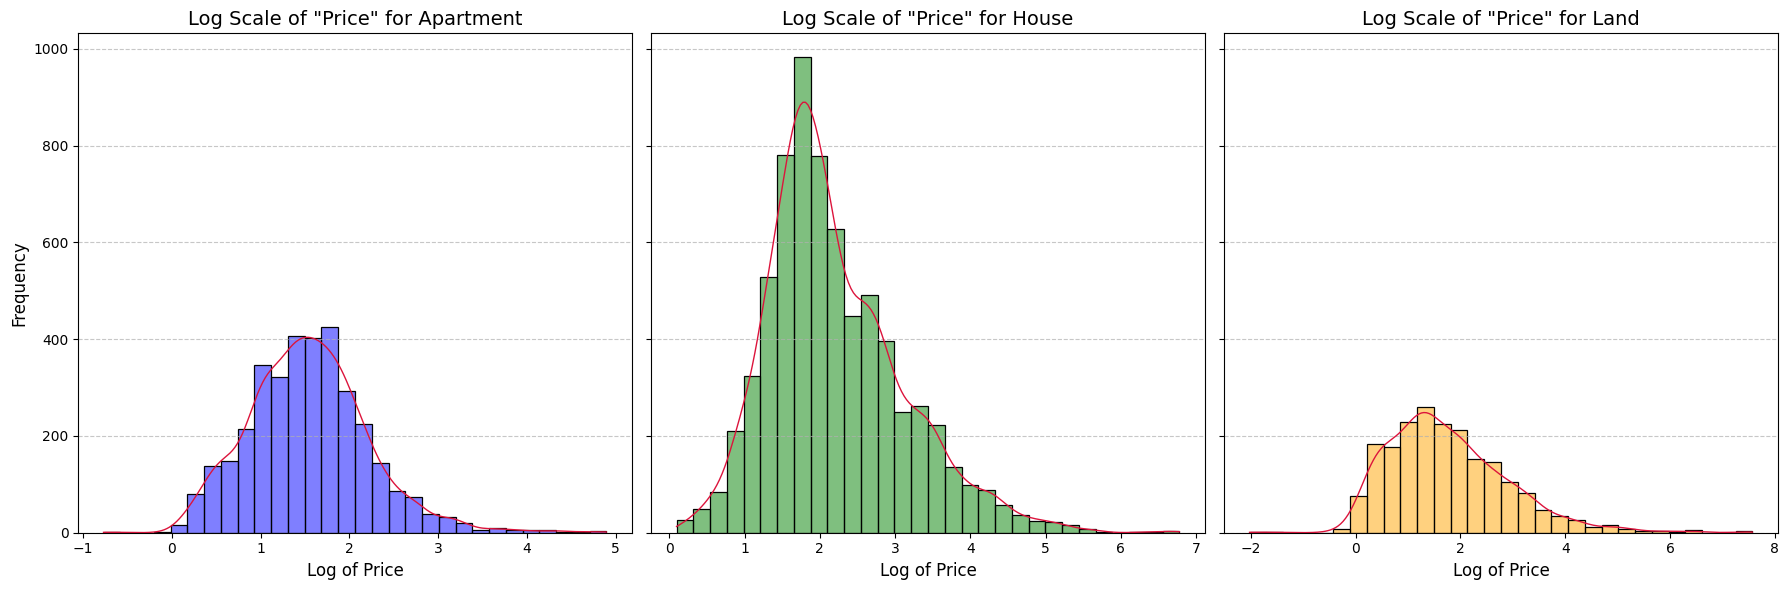

In [ ]:
# Log scale of Price for each type

type_mapping = {
    'CC': 'Apartment',
    'N': 'House',
    'Đ': 'Land'
}

types = ['CC', 'N', 'Đ']
colors = ['blue', 'green', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['Loại'] == t]
    ax = sns.histplot(
        np.log(subset['Mức giá']),
        kde=True,
        bins=30,
        color=color,
        line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Log Scale of "Price" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Log of Price", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


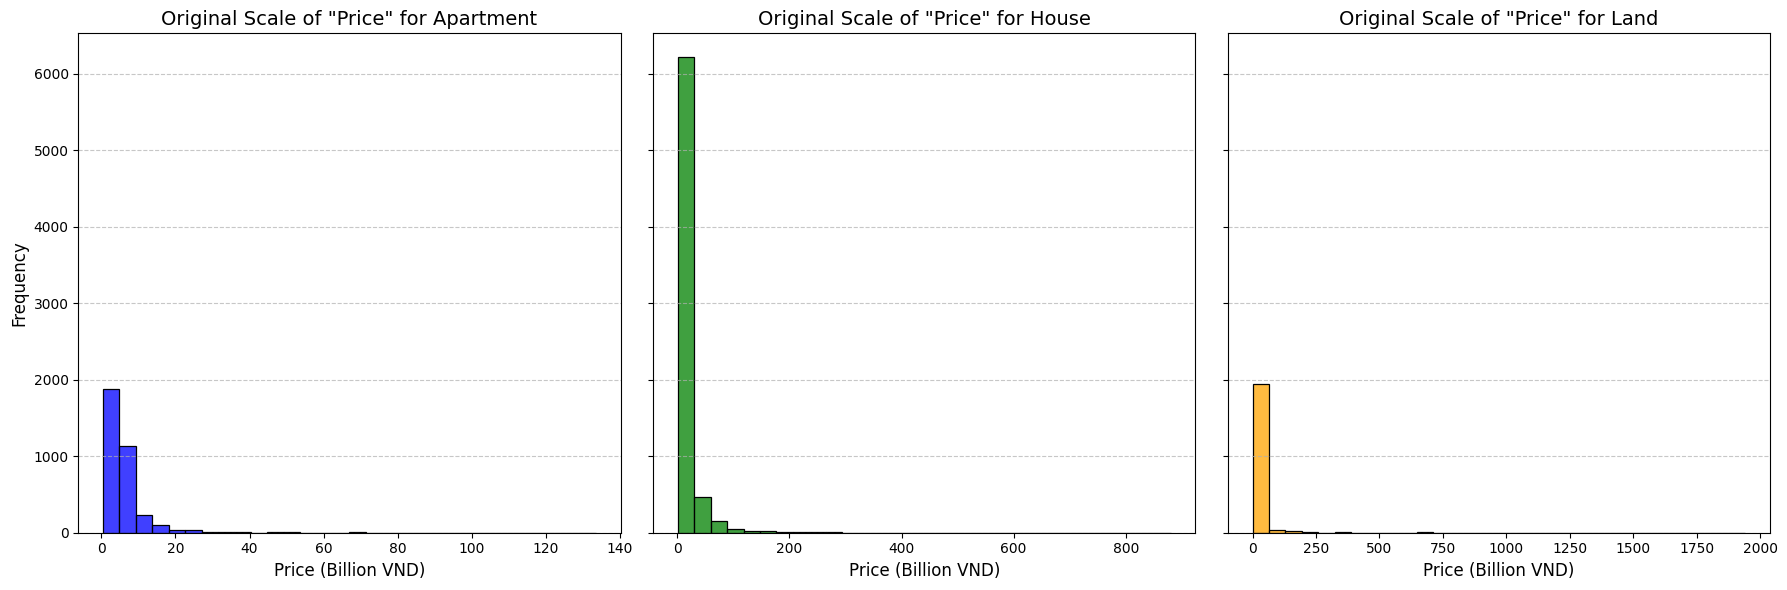

In [ ]:
# Original value of Price for each type

type_mapping = {
    'CC': 'Apartment',
    'N': 'House',
    'Đ': 'Land'
}

types = ['CC', 'N', 'Đ']
colors = ['blue', 'green', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['Loại'] == t]
    ax = sns.histplot(
        subset['Mức giá'],
        kde=False,
        bins=30,
        color=color,
        #line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Original Scale of "Price" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Price (Billion VND)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


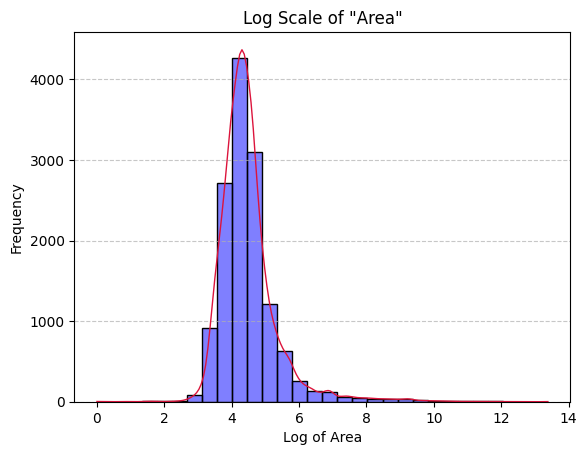

In [ ]:
# Histplot for log value of "Diện tích"

ax = sns.histplot(np.log(df['Diện tích']), kde=True, bins=30, color='blue', line_kws={'linewidth': 1})
ax.lines[0].set_color('crimson')

plt.title('Log Scale of "Area"')
plt.xlabel("Log of Area")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart shows the distribution of the log of Area, with a prominent peak around 4.5 and a long tail to the right. The distribution appears to be right-skewed, indicating that there are more smaller areas than larger ones.

**Key Insights**:
1. **Effectiveness of Log Transformation**:
   - The transformation has normalized the skewed distribution of property areas, making the data more suitable for predictive modeling.

2. **Typical Property Sizes**:
   - Most properties in the dataset have an area around \( $e^4$ = 54.6 \) square meters.

3. **Market Representation**:
   - The dataset predominantly contains small to medium-sized properties. The few large properties might represent premium or rural areas.

4. **Outlier Handling**:
   - The large properties in the right tail could introduce variability in the model. If predicting house prices, consider analyzing these separately or using feature engineering to account for their distinct characteristics.


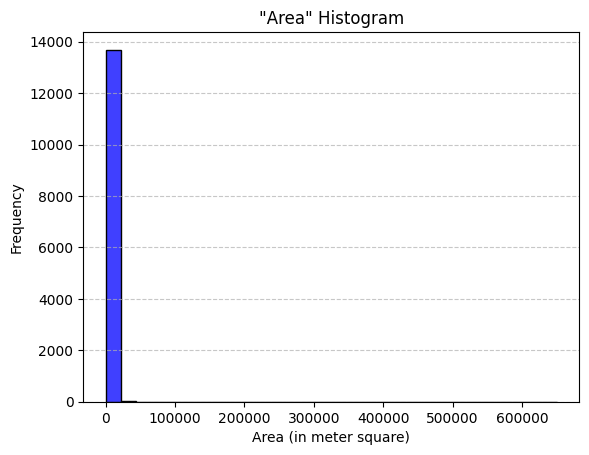

In [ ]:
ax = sns.histplot(df['Diện tích'], kde=False, bins=30, color='blue', line_kws={'linewidth': 1})
# ax.lines[0].set_color('crimson')

plt.title('"Area" Histogram')
plt.xlabel("Area (in meter square)")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


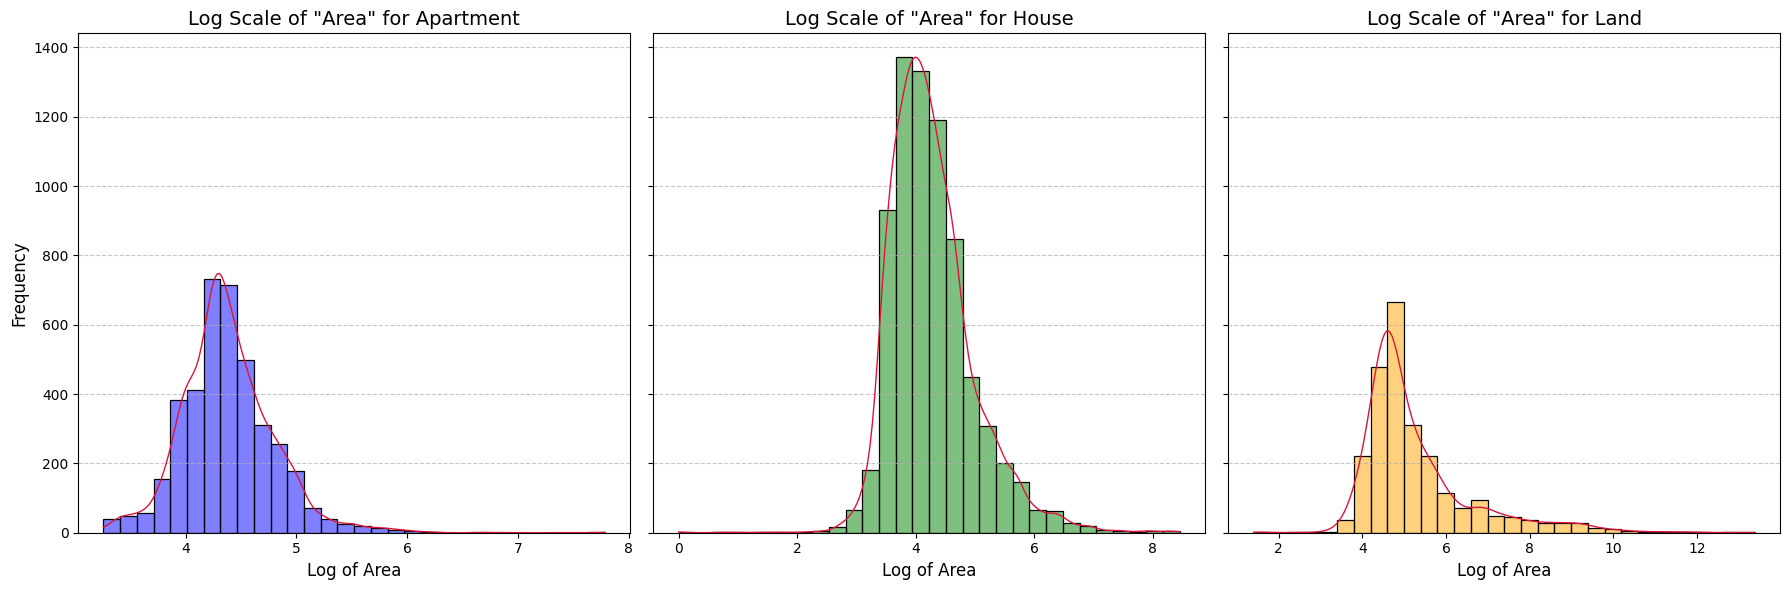

In [ ]:
# Log scale of Area for each type

type_mapping = {
    'CC': 'Apartment',
    'N': 'House',
    'Đ': 'Land'
}

types = ['CC', 'N', 'Đ']
colors = ['blue', 'green', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['Loại'] == t]
    ax = sns.histplot(
        np.log(subset['Diện tích']),
        kde=True,
        bins=30,
        color=color,
        line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Log Scale of "Area" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Log of Area", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


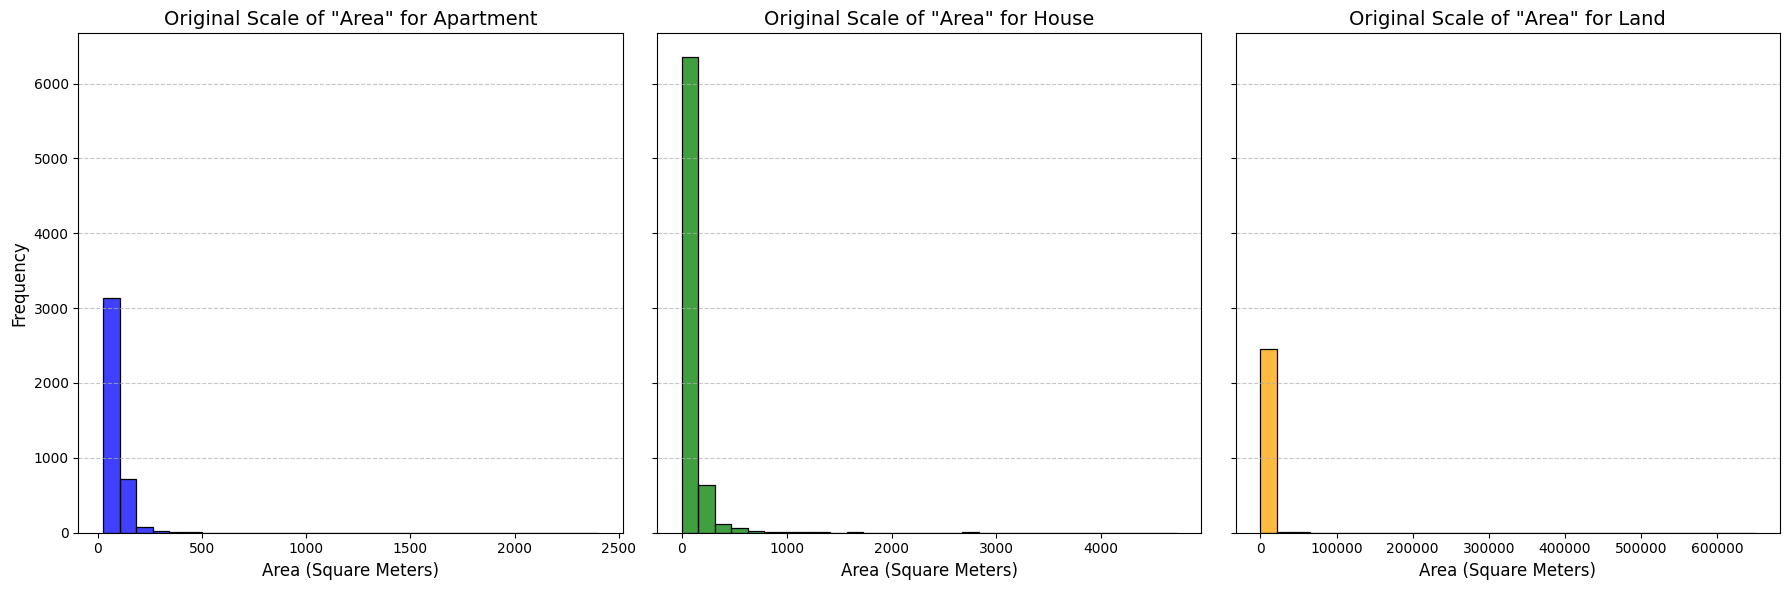

In [ ]:
# Original value of Area for each type

type_mapping = {
    'CC': 'Apartment',
    'N': 'House',
    'Đ': 'Land'
}

types = ['CC', 'N', 'Đ']
colors = ['blue', 'green', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['Loại'] == t]
    ax = sns.histplot(
        subset['Diện tích'],
        kde=False,
        bins=30,
        color=color,
        #line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Original Scale of "Area" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Area (Square Meters)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


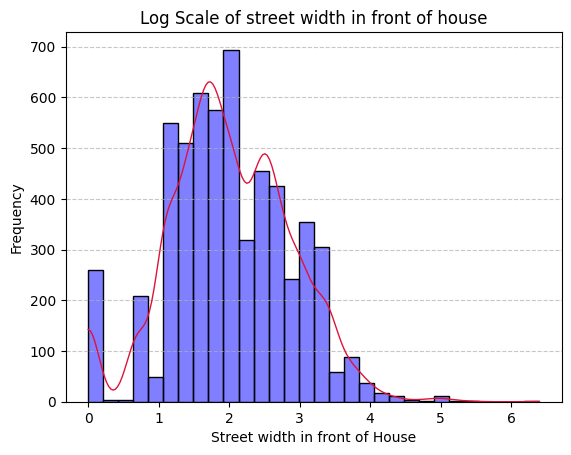

In [ ]:
ax = sns.histplot(np.log(df['Đường trước nhà']), kde=True, bins=30, color='blue', line_kws={'linewidth': 1})
ax.lines[0].set_color('crimson')

plt.title('Log Scale of street width in front of house')
plt.xlabel("Street width in front of House")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This chart represents the distribution of the **log scale** of street widths in front of houses.

**1. Distribution Characteristics**
- The distribution is **right-skewed**, indicating that the majority of the data lies towards smaller street widths, with fewer properties having wider streets.
- The peak frequency occurs near a log value of **2**, which translates approximately to a street width of 7–8 meters when converted back to the original scale.

**2. Most Common Street Width Range**
- Most properties are situated along streets with widths between **4–10 meters** (log values between 1.6 and 2.3).
- A smaller proportion of streets are wider than this range (log values above 2.5, corresponding to 12+ meters).

**3. Rare Occurrences of Extremely Narrow or Wide Streets**
- There is a small number of streets with log values near **0**, which corresponds to very narrow streets (~1–2 meters).
- Wider streets (log values above 3, corresponding to widths of 20+ meters) are also relatively rare.

**4. Implications for House Pricing**
- Properties on wider streets might command higher prices due to better accessibility and potential for commercial use.
- The narrow streets are likely to be in denser urban areas, where land scarcity could impact pricing differently.

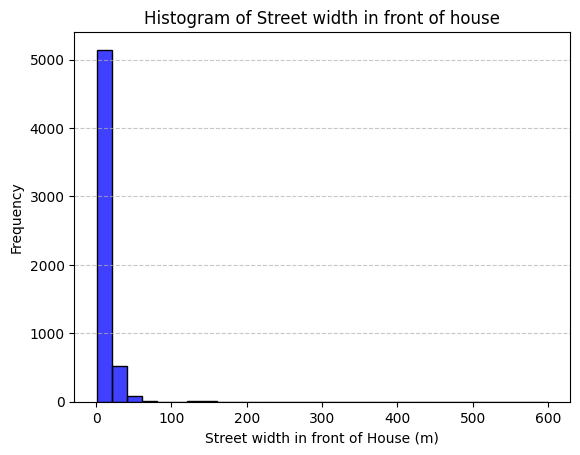

In [ ]:
ax = sns.histplot(df['Đường trước nhà'], kde=False, bins=30, color='blue', line_kws={'linewidth': 1})
#ax.lines[0].set_color('crimson')

plt.title('Histogram of Street width in front of house')
plt.xlabel("Street width in front of House (m)")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

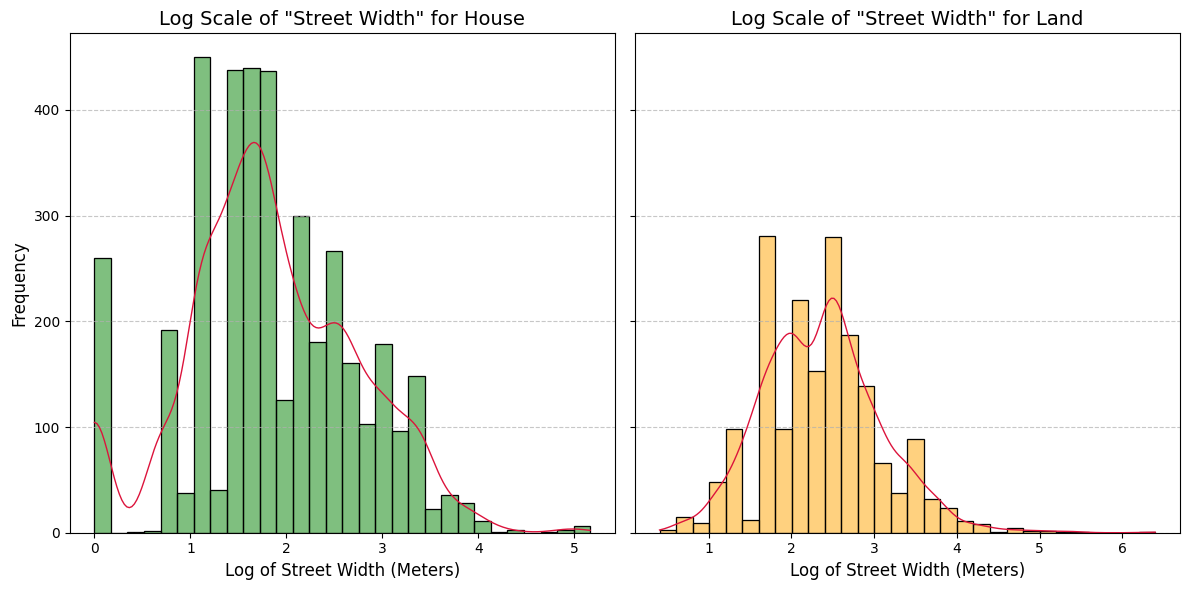

In [ ]:
type_mapping = {
    'N': 'House',
    'Đ': 'Land'
}

types = ['N', 'Đ']
colors = ['green', 'orange']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['Loại'] == t]
    ax = sns.histplot(
        np.log(subset['Đường trước nhà']),
        kde=True,
        bins=30,
        color=color,
        line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Log Scale of "Street Width" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Log of Street Width (Meters)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


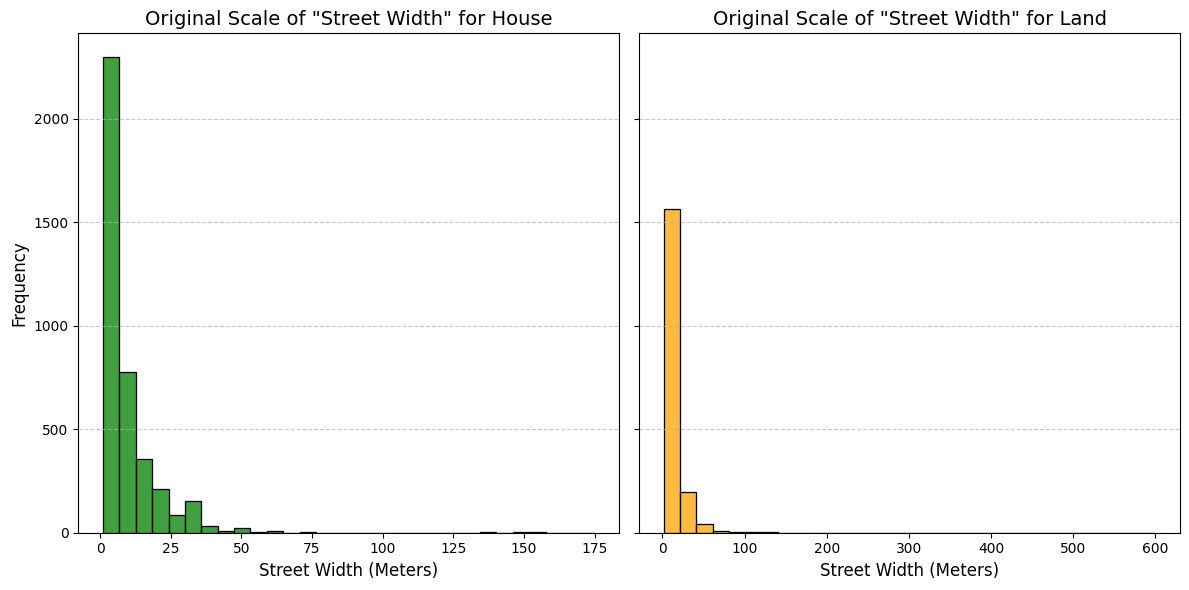

In [ ]:
type_mapping = {
    'N': 'House',
    'Đ': 'Land'
}

types = ['N', 'Đ']
colors = ['green', 'orange']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['Loại'] == t]
    ax = sns.histplot(
        subset['Đường trước nhà'],
        kde=False,
        bins=30,
        color=color,
        #line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Original Scale of "Street Width" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Street Width (Meters)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


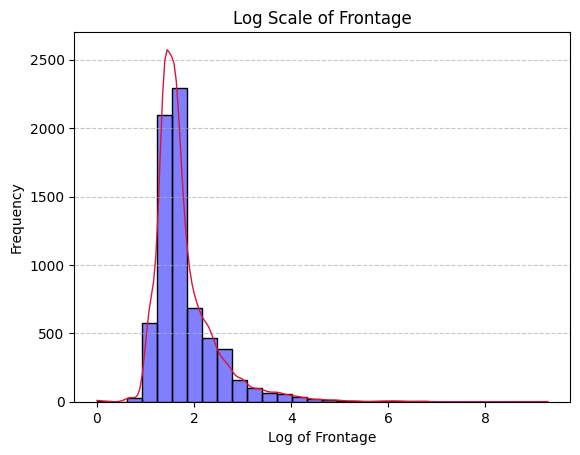

In [ ]:
ax = sns.histplot(np.log(df['Mặt tiền']), kde=True, bins=30, color='blue', line_kws={'linewidth': 1})
ax.lines[0].set_color('crimson')

plt.title('Log Scale of Frontage')
plt.xlabel("Log of Frontage")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


This chart shows the distribution of the **log scale of frontage**, which represents the width of a property facing the street.

**1. Distribution Characteristics**
- The distribution is **right-skewed**, meaning most properties have smaller frontages, and only a few have very large frontages.
- The peak frequency occurs around a log value of **2**, which corresponds approximately to a frontage of **10 meters** (since $10^{2}$ = 100).

**2. Common Frontage Range**
- Most properties have a frontage between **7–12 meters** (log values of ~1.8–2.1).
- Few properties have frontages wider than **30 meters** (log values exceeding 3).

**3. Rare Narrow or Extremely Wide Frontages**
- A small number of properties have very narrow frontages (log values close to 0, meaning ~1 meter).
- Similarly, extremely wide frontages (log values above 5, corresponding to 100+ meters) are rare.

**4. Implications for House Prices**
- Properties with larger frontages often correlate with higher property values, as they indicate spaciousness and potential for additional construction or landscaping.
- Narrow frontages may be more common in densely populated areas, where land is constrained.

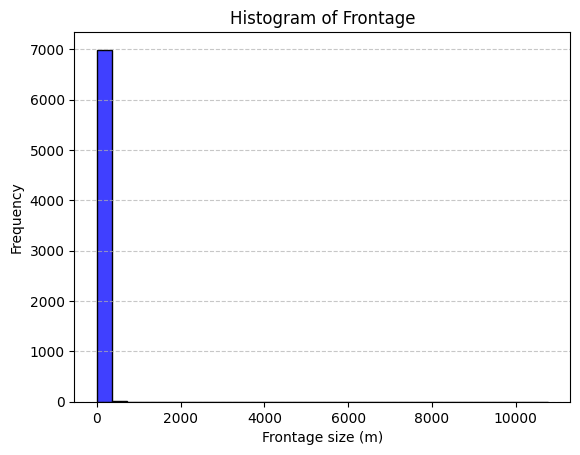

In [ ]:
ax = sns.histplot(df['Mặt tiền'], kde=False, bins=30, color='blue', line_kws={'linewidth': 1})

plt.title('Histogram of Frontage')
plt.xlabel("Frontage size (m)")
plt.ylabel("Frequency")

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


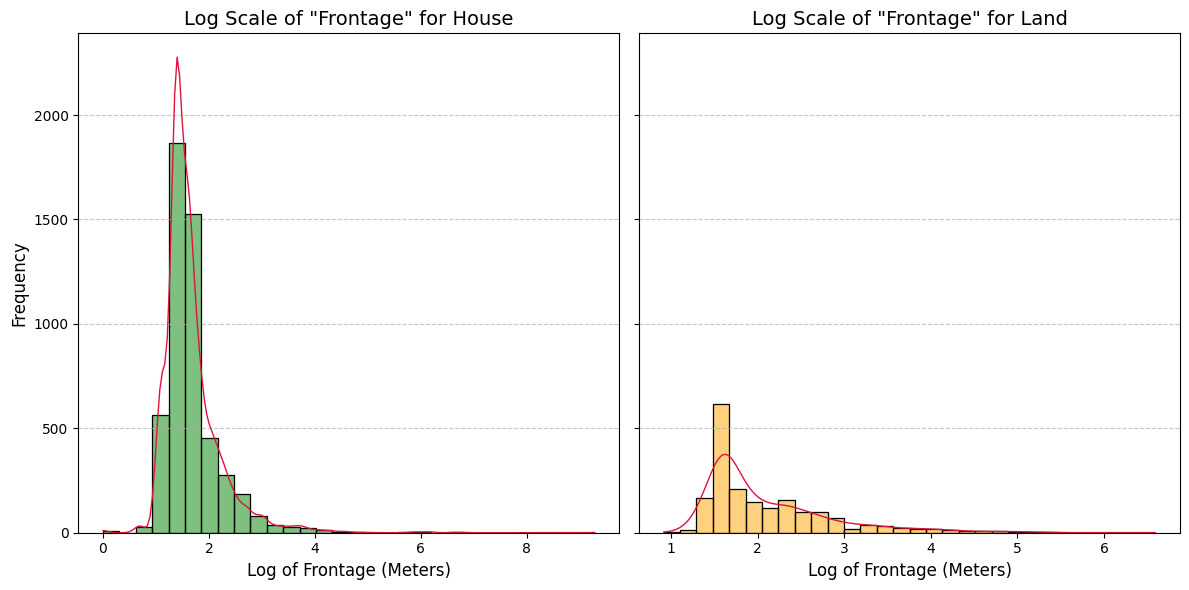

In [ ]:
type_mapping = {
    'N': 'House',
    'Đ': 'Land'
}

types = ['N', 'Đ']
colors = ['green', 'orange']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['Loại'] == t]
    ax = sns.histplot(
        np.log(subset['Mặt tiền']),
        kde=True,
        bins=30,
        color=color,
        line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Log Scale of "Frontage" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Log of Frontage (Meters)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


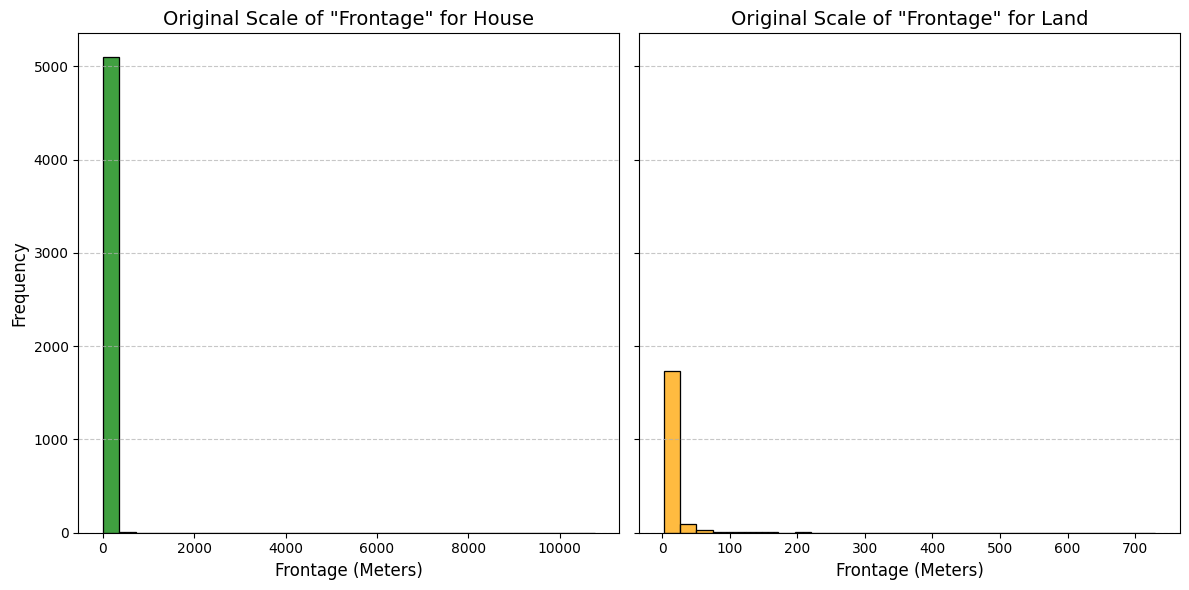

In [ ]:
type_mapping = {
    'N': 'House',
    'Đ': 'Land'
}

types = ['N', 'Đ']
colors = ['green', 'orange']

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, (t, color) in enumerate(zip(types, colors)):
    subset = df[df['Loại'] == t]
    ax = sns.histplot(
        subset['Mặt tiền'],
        kde=False,
        bins=30,
        color=color,
        #line_kws={'linewidth': 1},
        ax=axes[i]
    )
    if ax.lines:
        ax.lines[0].set_color('crimson')

    axes[i].set_title(f'Original Scale of "Frontage" for {type_mapping[t]}', fontsize=14)
    axes[i].set_xlabel("Frontage (Meters)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12 if i == 0 else 0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Bar chart for `Số tầng`, `Số toilet`, `Số phòng ngủ`

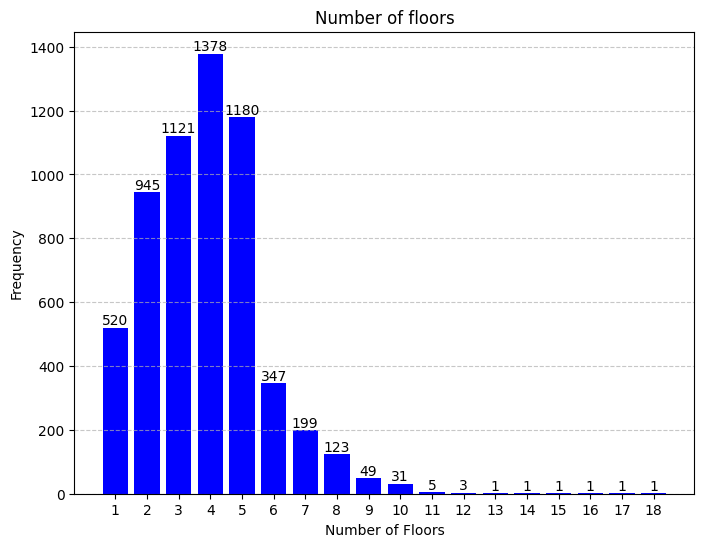

In [ ]:
# Visualize number of "Số tầng"

floor_counts = df['Số tầng'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
bars = plt.bar(floor_counts.index, floor_counts.values, color='blue')

plt.title('Number of floors')
plt.xlabel("Number of Floors")
plt.ylabel("Frequency")

plt.xticks(np.arange(min(floor_counts.index), max(floor_counts.index)+1, 1))
#plt.xticks([5, 10, 15])
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


The chart depicts the distribution of houses based on their number of floors. The distribution is highly right-skewed, meaning there are many houses with fewer floors and fewer houses with a higher number of floors. The majority of houses in this dataset have between 1 and 6 floors.

**Key Insights:**

1. **Majority of Houses are Low-Rise:**
   - The highest frequency is observed for houses with 4 floors, indicating that this is the most common type of house in the dataset.
   - A significant proportion of houses also have 1, 2, 3, and 5 floors.
   - The frequency decreases rapidly as the number of floors increases, suggesting that high-rise buildings are less common.

2. **Scarcity of High-Rise Buildings:**
   - The number of houses with more than 10 floors is negligible.
   - This suggests that the dataset primarily focuses on residential or low-rise commercial buildings.

**Potential Implications for House Price Prediction:**

1. **Number of Floors as a Feature:**
   - The number of floors is likely to be a relevant feature for house price prediction models.
   - Houses with more floors may generally command higher prices, but the relationship might not be linear due to the skewed distribution.

2. **Model Complexity:**
   - Given the non-linear relationship between floors and price, a complex model like a decision tree or a neural network might be necessary to capture the nuances.

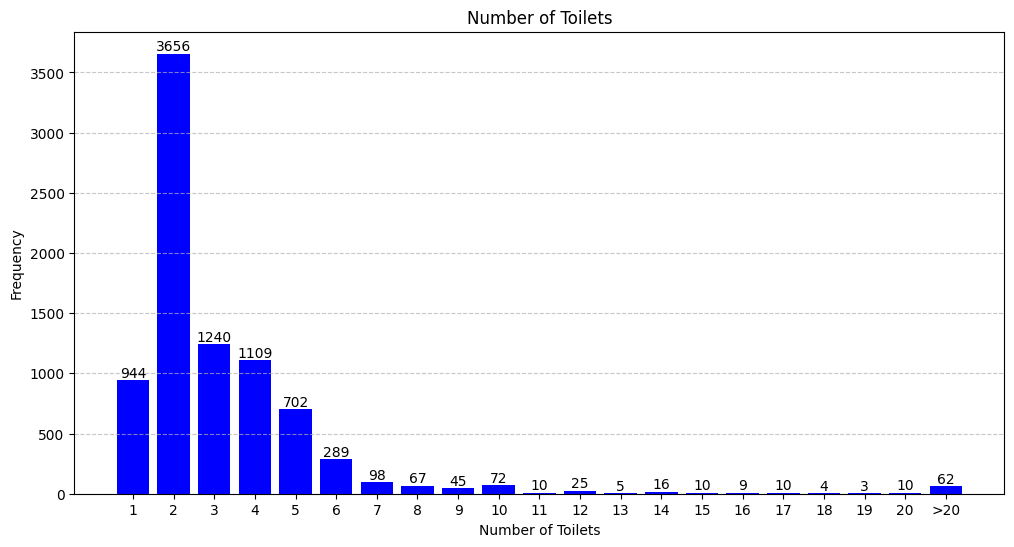

In [ ]:
# Visualize number of "Số toilet"

toilet_counts = df['Số toilet'].value_counts().sort_index()

toilet_counts_filtered = toilet_counts[toilet_counts.index <= 20]
toilet_counts_filtered.index = toilet_counts_filtered.index.astype(int)


toilet_counts_above_20 = toilet_counts[toilet_counts.index > 20].sum()
if toilet_counts_above_20 > 0:
    toilet_counts_filtered['>20'] = toilet_counts_above_20

toilet_counts_filtered.index = list(map(str, toilet_counts_filtered.index))

plt.figure(figsize=(12, 6))
bars = plt.bar(toilet_counts_filtered.index, toilet_counts_filtered.values, color='blue')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Number of Toilets')
plt.xlabel("Number of Toilets")
plt.ylabel("Frequency")

# Add number on the right
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


The chart depicts the distribution of houses based on their number of toilets. The distribution is highly right-skewed, meaning there are many houses with fewer toilets and fewer houses with a higher number of toilets. The majority of houses in this dataset have between 1 and 6 toilets.

**Key Insights:**

1. **Majority of Houses have Few Toilets:**
   - The highest frequency is observed for houses with 2 toilet, indicating that this is the most common type of house in the dataset.
   - A significant proportion of houses also have 1, 3, and 4 toilets.
   - The frequency decreases rapidly as the number of toilets increases, suggesting that houses with many toilets are less common.

2. **Scarcity of Houses with Many Toilets:**
   - The number of houses with more than 10 toilets is negligible.
   - This suggests that the dataset primarily focuses on residential or low-rise commercial buildings.

**Potential Implications for House Price Prediction:**

1. **Number of Toilets as a Feature:**
   - The number of toilets is likely to be a relevant feature for house price prediction models.
   - Houses with more toilets may generally command higher prices, but the relationship might not be linear due to the skewed distribution.

2. **Model Complexity:**
   - Given the non-linear relationship between toilets and price, a complex model like a decision tree or a neural network might be necessary to capture the nuances.

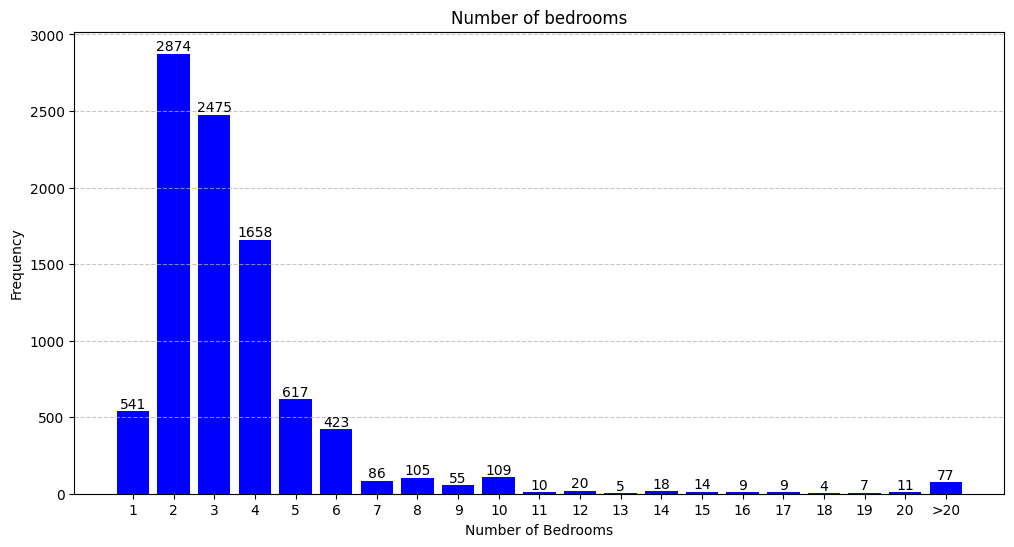

In [ ]:
bedroom_counts = df['Số phòng ngủ'].value_counts().sort_index()

bedroom_counts_filtered = bedroom_counts[bedroom_counts.index <= 20]
bedroom_counts_filtered.index = bedroom_counts_filtered.index.astype(int)


bedroom_counts_above_20 = bedroom_counts[bedroom_counts.index > 20].sum()
if bedroom_counts_above_20 > 0:
    bedroom_counts_filtered['>20'] = bedroom_counts_above_20


bedroom_counts_filtered.index = list(map(str, bedroom_counts_filtered.index))

plt.figure(figsize=(12, 6))
bars = plt.bar(bedroom_counts_filtered.index, bedroom_counts_filtered.values, color='blue')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Number of bedrooms')
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency")

# Add number on the right
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)),
             ha='center', va='bottom', fontsize=10, color='black')

plt.show()


The chart depicts the distribution of houses based on their number of bedrooms. The distribution is highly right-skewed, meaning there are many houses with fewer bedrooms and fewer houses with a higher number of bedrooms. The majority of houses in this dataset have between 2 and 4 bedrooms.

**Key Insights:**

1. **Majority of Houses have Few Bedrooms:**
   - The highest frequency is observed for houses with 2 bedrooms, indicating that this is the most common type of house in the dataset.
   - A significant proportion of houses also have 3 and 4 bedrooms.
   - The frequency decreases rapidly as the number of bedrooms increases, suggesting that houses with many bedrooms are less common.

2. **Scarcity of Houses with Many Bedrooms:**
   - The number of houses with more than 10 bedrooms is negligible.
   - This suggests that the dataset primarily focuses on residential or low-rise commercial buildings.

**Potential Implications for House Price Prediction:**

1. **Number of Bedrooms as a Feature:**
   - The number of bedrooms is likely to be a highly relevant feature for house price prediction models.
   - Houses with more bedrooms may generally command higher prices, but the relationship might not be linear due to the skewed distribution.

2. **Model Complexity:**
   - Given the non-linear relationship between bedrooms and price, a complex model like a decision tree or a neural network might be necessary to capture the nuances.

## **Multiple Numerical Feature Analysis**

### Heatmap of correlation matrix

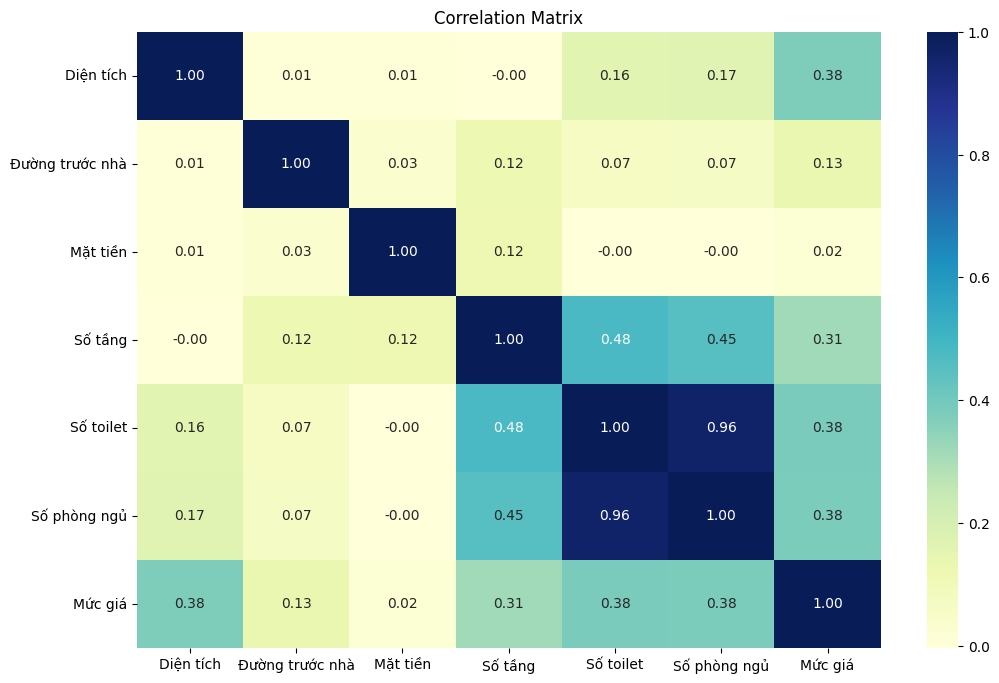

In [ ]:
# Correlation matrix

df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

This chart presents the correlation coefficients between various features, helping to identify relationships in the dataset. Here's the specific analysis:

1. **Strong Correlations**
    1. **Số toilet** and **Số phòng ngủ**:
    - Correlation: **0.96**
    - These features are almost perfectly correlated, suggesting that the number of bedrooms strongly influences the number of bathrooms in a property.

    2. **Số tầng** and **Số toilet**/**Số phòng ngủ**:
    - Correlation: **0.48** (with both).
    - Indicates that taller buildings (more floors) generally have more rooms and bathrooms.

2. **Moderate Correlations**
    1. **Mức giá** and **Diện tích**:
    - Correlation: **0.35**
    - Properties with larger areas tend to have higher prices, although the relationship is not very strong.
    
    2. **Mức giá** and **Số toilet/Số phòng ngủ**:
    - Correlation: **0.38** (with both).
    - Suggests a moderate influence of the number of rooms and bathrooms on property prices.

3. **Weak or Negligible Correlations**
    1. **Mặt tiền** with all features:
    - Correlation: Close to **0** across most features.
    - Indicates minimal impact of frontage width on other attributes, including price.

    2. **Đường trước nhà** and other features:
    - Correlation values are weak (**~0.01–0.16**), suggesting the road size in front of a property has little relationship with other factors.

#### **Key Observations**
- **Price Influencers**: Area, number of bedrooms, and number of bathrooms moderately impact property prices, but no single factor dominates.
- **Interdependent Features**: Some features, like bedrooms and bathrooms, are highly correlated and may be redundant in modeling.
- **Minimal Impact**: Features like frontage and road width contribute minimally to other attributes, indicating lower importance in pricing or property layout.

## **Single Categorical Feature Analysis**

In [ ]:
# Value counts for each column
for column in ['Thành phố', 'Loại', 'Hướng']:
    print(f"Value counts for column '{column}': {df[column].count()}")

Value counts for column 'Thành phố': 13719
Value counts for column 'Loại': 13728
Value counts for column 'Hướng': 4740


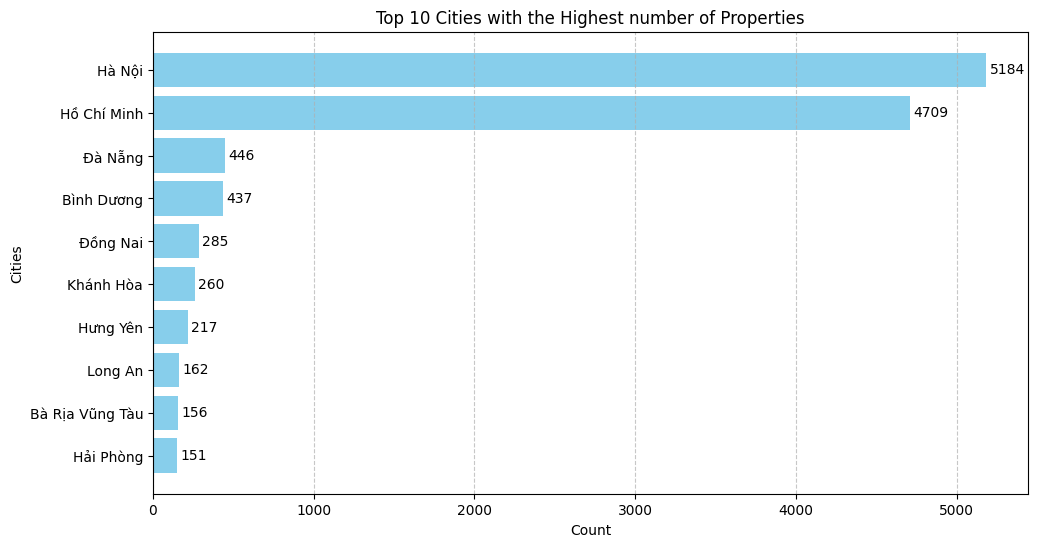

In [ ]:
filtered_city_counts = df['Thành phố'].dropna()
filtered_city_counts = filtered_city_counts[filtered_city_counts != 'KXĐ']

city_counts = filtered_city_counts.value_counts()
top_10_cities = city_counts.nlargest(10)
top_10_cities_sorted = top_10_cities.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_cities_sorted.index.str.title(), top_10_cities_sorted.values, color='skyblue')

for bar in bars:
    plt.text(bar.get_width() + 20, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10)

plt.subplots_adjust(right=1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title('Top 10 Cities with the Highest number of Properties')
plt.xlabel('Count')
plt.ylabel('Cities')

plt.show()


The chart shows the top 10 cities in Vietnam with the highest number of properties. Hanoi and Ho Chi Minh City dominate with significantly higher counts, at 5,184 and 4,709 respectively, making up the majority of the data. Other cities like Da Nang, Binh Duong, and Dong Nai have considerably fewer houses, ranging from 151 to 446, highlighting a stark contrast between the two major cities and the rest.

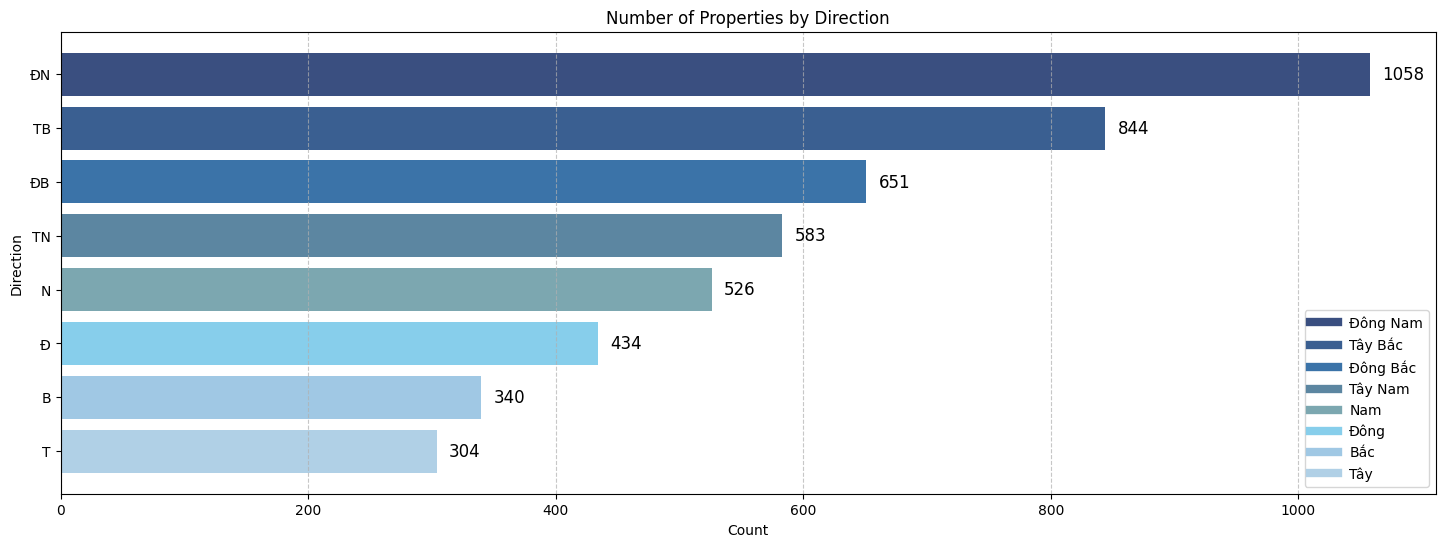

In [ ]:
# Number of properties by Direction

direction_counts = df['Hướng'].value_counts()
direction_counts = direction_counts.sort_values(ascending=True)

desired_order = ['ĐN', 'TB', 'ĐB', 'TN', 'N', 'Đ', 'B', 'T']

# 8 colors for the directions in decreasing importance order (darker to lighter)
color_map = {
    'ĐB': '#3B73A8',
    'T': '#B0D0E6',
    'TN': '#5C86A1',
    'N': '#7CA7B0',
    'ĐN': '#3A4F80',
    'TB': '#3A5F91',
    'Đ': '#87CEEB',
    'B': '#A0C8E4'
}

full_direction_names = {
    'ĐN': 'Đông Nam',
    'Đ': 'Đông',
    'T': 'Tây',
    'N': 'Nam',
    'B': 'Bắc',
    'TN': 'Tây Nam',
    'ĐB': 'Đông Bắc',
    'TB': 'Tây Bắc'
}

colors = [color_map.get(x, 'gray') for x in direction_counts.index]

plt.figure(figsize=(10, 6))
bars = plt.barh(direction_counts.index, direction_counts.values, color=colors)

for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.subplots_adjust(right=1.5)

plt.title('Number of Properties by Direction')
plt.xlabel('Count')
plt.ylabel('Direction')

handles = [plt.Line2D([0], [0], color=color_map[key], lw=6, label=full_direction_names[key]) for key in desired_order]
plt.legend(handles=handles)

plt.show()

The chart shows the distribution of properties by their orientation, with "Đông Nam" (Southeast) being the most common at 1,058 properties. Following it are "Tây Bắc" (Northwest) with 844 and "Đông Bắc" (Northeast) with 651. "Tây Nam" (Southwest) and "Nam" (South) occupy the middle range with 583 and 526 properties, respectively. Orientations like "Bắc" (North) and "Tây" (West) are the least common, with counts of 340 and 304.

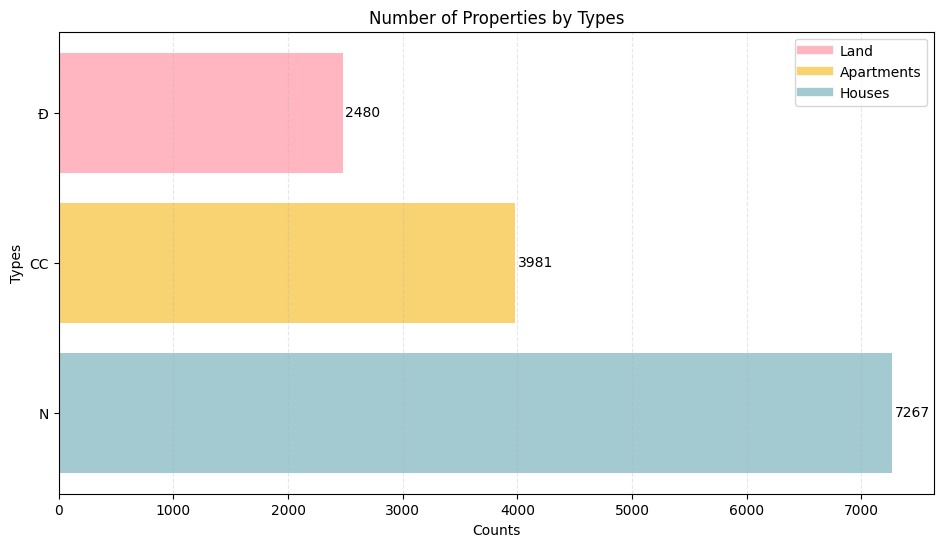

In [ ]:
# Number of houses by each Type

type_counts = df['Loại'].value_counts()

ordered_types = ['N', 'CC', 'Đ']
type_counts = type_counts[ordered_types]

color_map = {
    'Đ': '#ffb6c1',
    'N': '#a3c9d1',
    'CC': '#f9d372'
}

colors = [color_map.get(x, 'gray') for x in type_counts.index]

plt.figure(figsize=(10, 6))
bars = plt.barh(type_counts.index, type_counts.values, color=colors)

plt.title('Number of Properties by Types')
plt.xlabel('Counts')
plt.ylabel('Types')

legend_labels = {
    'Đ': 'Land',
    'CC': 'Apartments',
    'N': 'Houses'
}

for bar in bars:
    plt.text(bar.get_width() + 20, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.subplots_adjust(right=1)

handles = [plt.Line2D([0], [0], color=color_map[key], lw=6, label=legend_labels[key]) for key in ['Đ', 'CC', 'N']]
plt.legend(handles=handles)

plt.show()

The chart categorizes properties into three types: Houses, Apartments, and Land. "Houses" dominates with 7,267 listings, followed by "Apartments" at 3,981, and "Land" at 2,480. This distribution shows that "Houses" are the most prevalent property type, making up the majority of the data.

## **Multiple Categorical Feature Analysis**

### The Relationship Between `Hướng` and `Other Features`

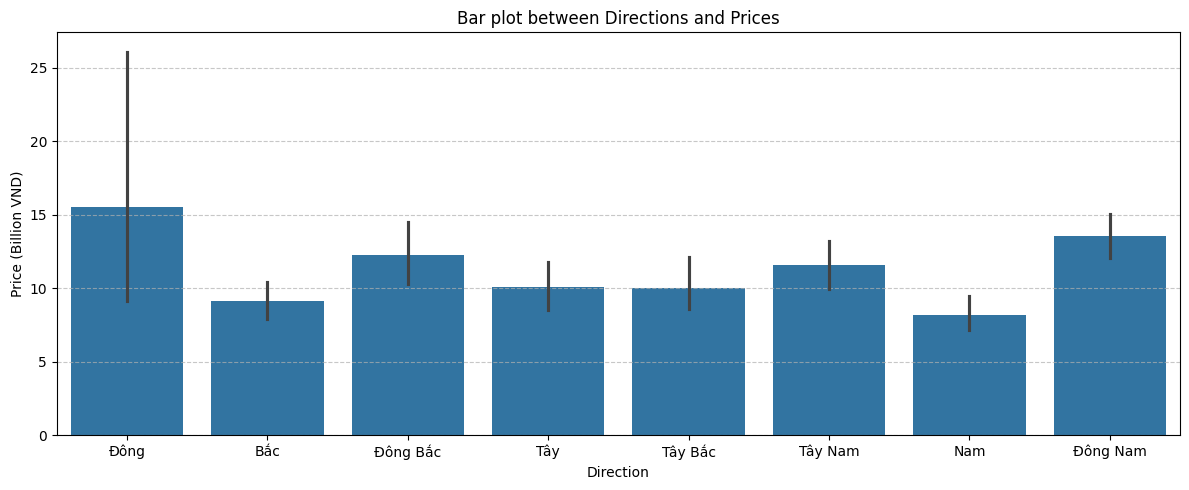

In [ ]:
# Bar plot between directions and prices

direction_mapping = {
    'Đ': 'Đông',
    'T': 'Tây',
    'N': 'Nam',
    'B': 'Bắc',
    'ĐN': 'Đông Nam',
    'TN': 'Tây Nam',
    'ĐB': 'Đông Bắc',
    'TB': 'Tây Bắc'
}

plt.figure(figsize=(12, 5))
sns.barplot(x='Hướng', y='Mức giá', data=df)

xticks_labels = df['Hướng'].dropna().unique()
mapped_labels = [direction_mapping.get(label, label) for label in xticks_labels]

plt.xticks(ticks=range(len(mapped_labels)), labels=mapped_labels)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Bar plot between Directions and Prices")
plt.xlabel("Direction")
plt.ylabel("Price (Billion VND)")

plt.tight_layout()
plt.show()


The bar plot illustrates the relationship between house directions and their corresponding prices in billion Vietnamese Dong. It is evident that houses in East direction (Đông) tend to have the highest average price, surpassing 15 billion VND, and this value fluctuate significantly between less than 10 to more than 25 billion VND. In contrast, properties in South direction (Nam) have the lowest average price, below 8 billion VND, with a small fluctuation of 1 billion. Other directions show a moderate average price, between 9 to 13 billions in general, and vary within about 2 billions.

**Key Insights**
1. **Price Variability**:
   - Direction significantly impacts house prices, with **East-facing properties** being more premium and variable, while **South-facing properties** are more affordable and stable.

2. **Market Implications**:
   - Buyers seeking more affordable and consistent pricing might prefer **South-facing** homes.
   - **East-facing homes** may cater to high-end buyers willing to pay a premium for direction-related advantages, possibly due to cultural or environmental preferences.

### The Relationship Between `Loại` and `Other Features`

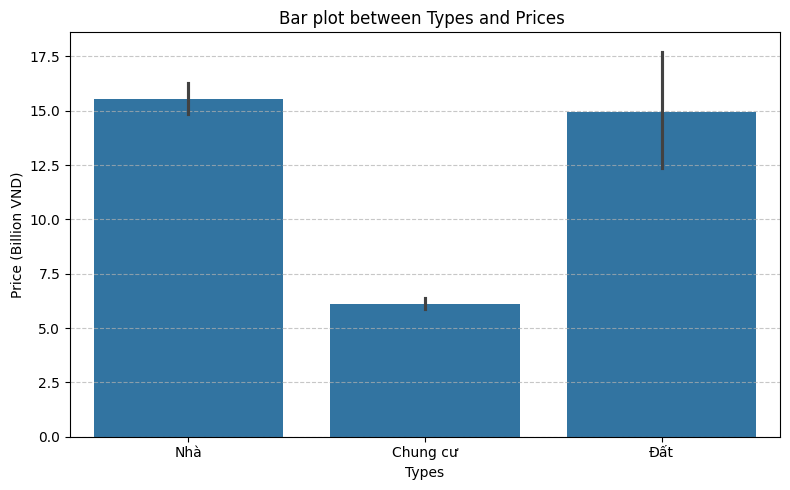

In [ ]:
# Bar plot between types and prices

type_mapping = {
    'N': 'Nhà',
    'CC': 'Chung cư',
    'Đ': 'Đất'
}

plt.figure(figsize=(8, 5))
sns.barplot(x='Loại', y='Mức giá', data=df)

xticks_labels = df['Loại'].dropna().unique()
mapped_labels = [type_mapping.get(label, label) for label in xticks_labels]

plt.xticks(ticks=range(len(mapped_labels)), labels=mapped_labels, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Bar plot between Types and Prices ")
plt.xlabel("Types")
plt.ylabel("Price (Billion VND)")

plt.tight_layout()
plt.show()


The bar plot illustrates the relationship between house types and their corresponding prices in billion Vietnamese Dong (VND). It is evident that houses (Nhà) and land (Đất) tend to have the highest average price, both surpassing 15 billion VND. However, while the price of houses shows a small variation within about 1 billion, the price of land oscillate considerably from 12.5 to 17.5 billion VND. On the other hand, Apartments (Chung cư) exhibit a significantly lower average price, hovering around the 6 billion VND mark with a negligible fluctuation.

**Key Insights**
1. **Market Implications**:
   - **Houses** and **Land** are premium segments and should be modeled with attention to their distinct characteristics.
   - **Apartments** are a budget-friendly category and may appeal to first-time buyers or those in urban areas.

2. **Feature Engineering Suggestions**:
   - Use **property type** as a categorical variable in the prediction model to capture the price differences effectively.
   - For **land**, consider incorporating additional features such as area or location to account for variability.

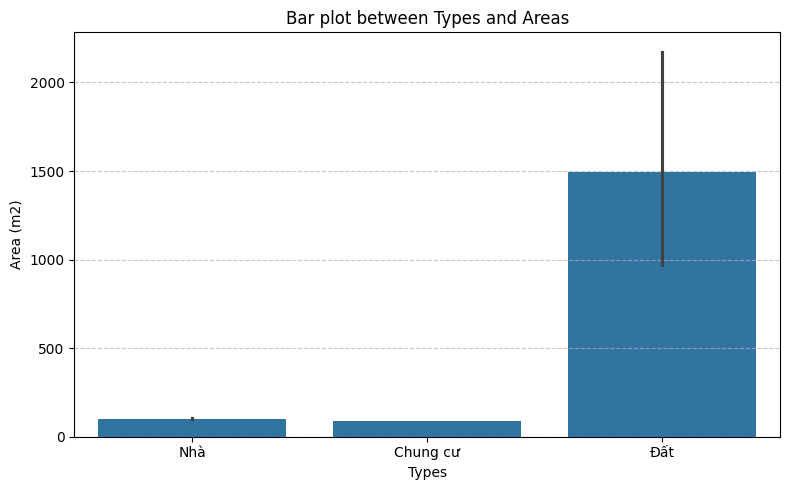

In [ ]:
# Bar plot between types and areas

type_mapping = {
    'N': 'Nhà',
    'CC': 'Chung cư',
    'Đ': 'Đất'
}

plt.figure(figsize=(8, 5))
sns.barplot(x='Loại', y='Diện tích', data=df)

xticks_labels = df['Loại'].dropna().unique()
mapped_labels = [type_mapping.get(label, label) for label in xticks_labels]

plt.xticks(ticks=range(len(mapped_labels)), labels=mapped_labels, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Bar plot between Types and Areas")
plt.xlabel("Types")
plt.ylabel("Area (m2)")

plt.tight_layout()
plt.show()


The bar plot illustrates the relationship between house types and their corresponding areas in square meters (m2). It is evident that Land (Đất) has the largest average area, surpassing 1500 m2, while Houses (Nhà) and Apartments (Chung cư) exhibit remarkably smaller average areas, hovering around 150 m2 and 200 m2 respectively.

**Key Insights**
1. **Market Segmentation**:
   - **Land** is likely targeted toward buyers or investors seeking large spaces, such as for commercial development, farming, or luxury estates.
   - **Houses** and **Apartments** cater to residential buyers, with compact spaces suited for living in urban or suburban areas.

2. **Feature Correlation**:
   - Property type strongly correlates with area size, which can be an essential feature in predicting prices or targeting specific buyer segments.

### The Relationship Between `Thành phố` and `Other Features`

<ipython-input-62-2578c5ba2587>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


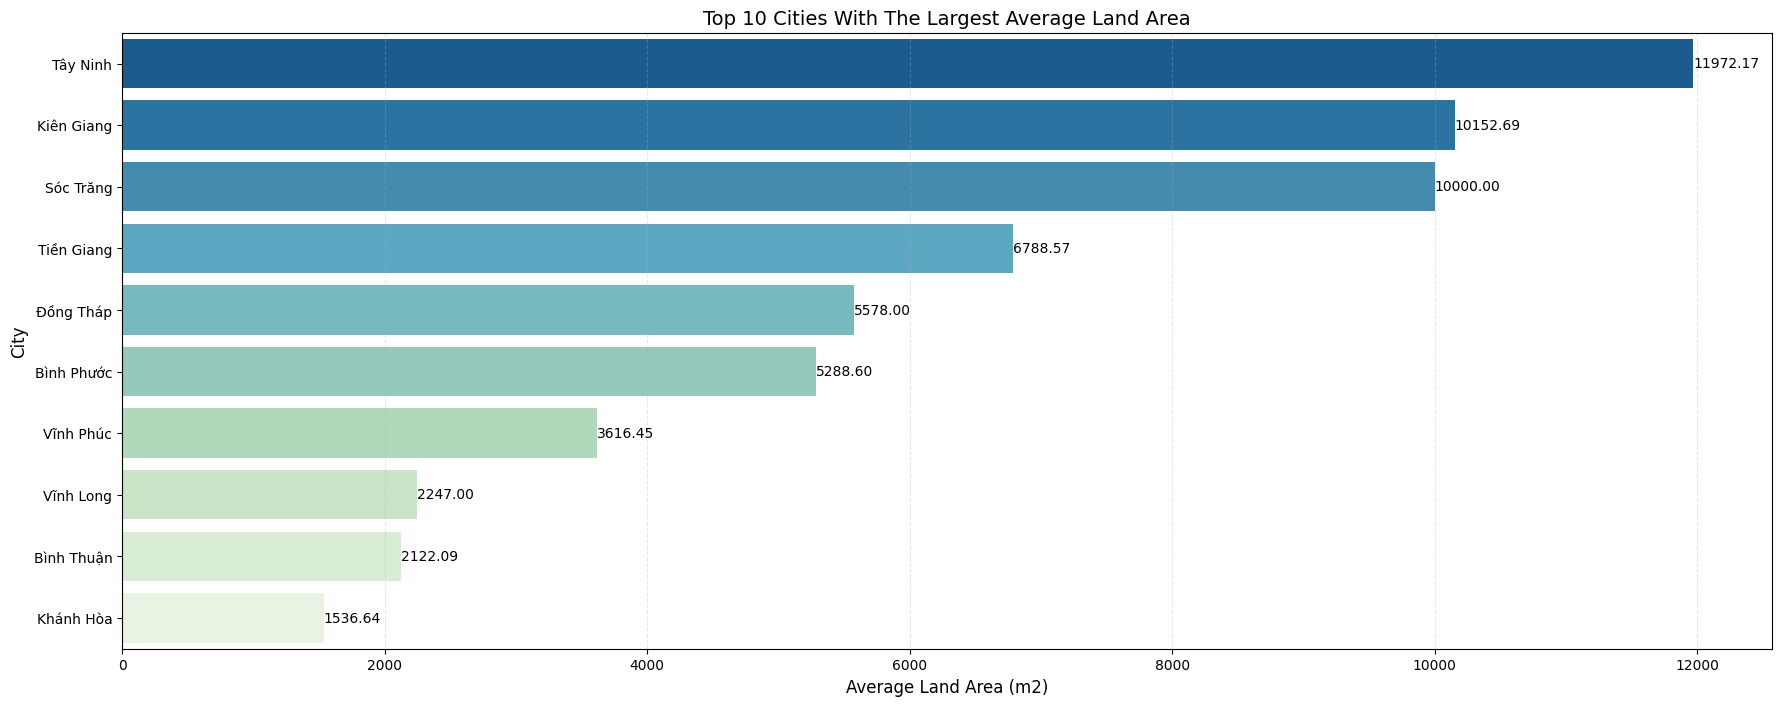

In [ ]:
# Filter Top 10 Cities With The Largest Average Land Area
top_10_cities = df[['Thành phố', 'Diện tích']].groupby('Thành phố').mean().nlargest(10, 'Diện tích').reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_10_cities,
    x='Diện tích',
    y=top_10_cities['Thành phố'].str.title(),
    palette='GnBu_r'
)

# Add values to the end of each bar
for index, value in enumerate(top_10_cities['Diện tích']):
    plt.text(
        value + 0.5,
        index,
        f'{value:.2f}',
        va='center',
        fontsize=10
    )

plt.subplots_adjust(right=1.5)
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.title("Top 10 Cities With The Largest Average Land Area", fontsize=14)
plt.xlabel("Average Land Area (m2)", fontsize=12)
plt.ylabel("City", fontsize=12)
plt.show()


The chart highlights the top 10 cities with the largest average land area (in square meters). Tây Ninh leads significantly with an average land area of 11,972.17 m², followed by Kiên Giang (10,152.69 m²) and Sóc Trăng (10,000.00 m²). The large land sizes in these provinces likely reflect their rural and agricultural nature, which provides more space per property compared to urban areas. Provinces like Khánh Hòa and Bình Thuận, despite being popular coastal areas, rank lower due to higher population density and tourism-driven land division.

<ipython-input-10-f53a0b9b3e21>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-f53a0b9b3e21>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-f53a0b9b3e21>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


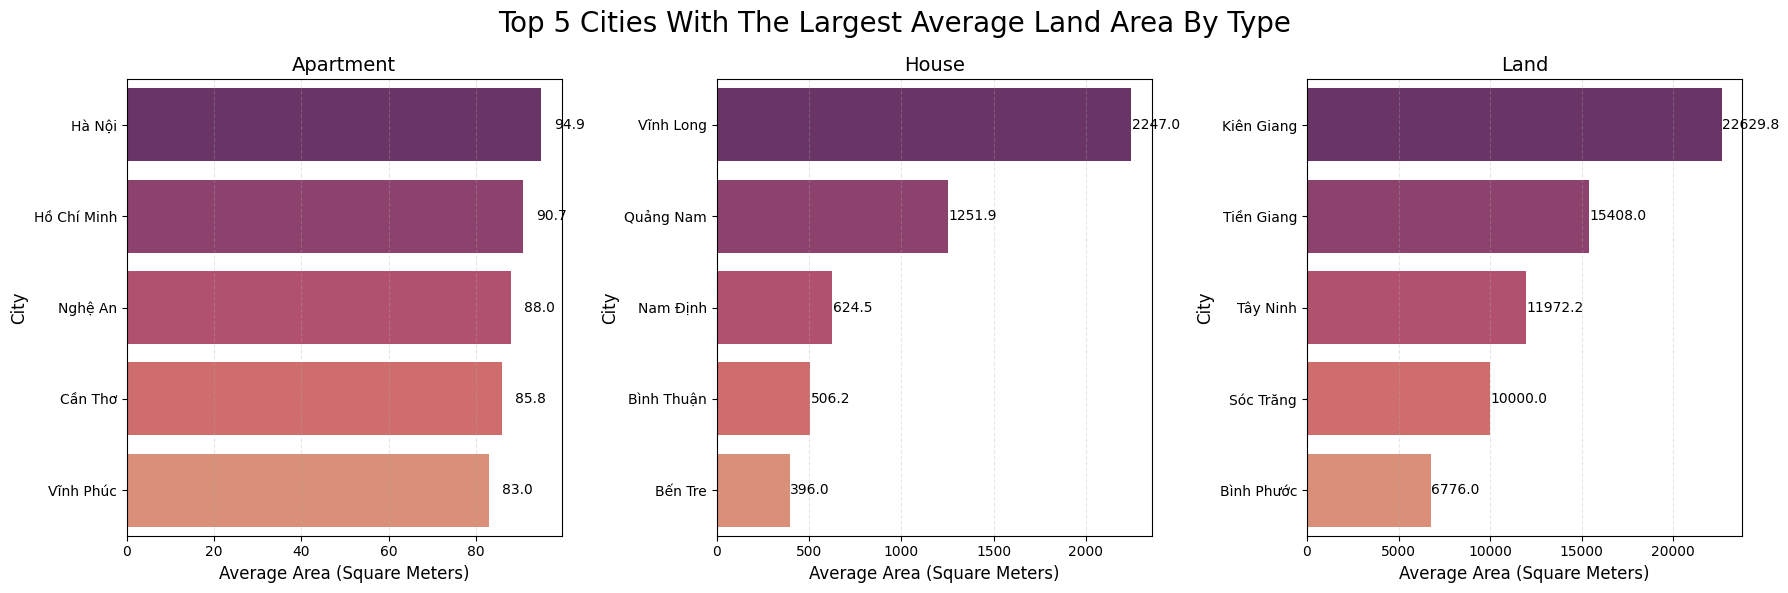

In [ ]:
# Filter data for each type and get top 5 cities with the largest average land area for each type
top_5_cc = df[df['Loại'] == 'CC'][['Thành phố', 'Diện tích']].groupby('Thành phố').mean().nlargest(5, 'Diện tích').reset_index()
top_5_n = df[df['Loại'] == 'N'][['Thành phố', 'Diện tích']].groupby('Thành phố').mean().nlargest(5, 'Diện tích').reset_index()
top_5_d = df[df['Loại'] == 'Đ'][['Thành phố', 'Diện tích']].groupby('Thành phố').mean().nlargest(5, 'Diện tích').reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Apartment
sns.barplot(
    data=top_5_cc,
    x='Diện tích',
    y=top_5_cc['Thành phố'].str.title(),
    palette='flare_r',
    ax=axes[0]
)
axes[0].set_title('Apartment', fontsize=14)
axes[0].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[0].set_ylabel('City', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for House
sns.barplot(
    data=top_5_n,
    x='Diện tích',
    y=top_5_n['Thành phố'].str.title(),
    palette='flare_r',
    ax=axes[1]
)
axes[1].set_title('House', fontsize=14)
axes[1].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[1].set_ylabel('City', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for Land
sns.barplot(
    data=top_5_d,
    x='Diện tích',
    y=top_5_d['Thành phố'].str.title(),
    palette='flare_r',
    ax=axes[2]
)
axes[2].set_title('Land', fontsize=14)
axes[2].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[2].set_ylabel('City', fontsize=12)
axes[2].grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels to each bar
for ax, top_5_data in zip(axes, [top_5_cc, top_5_n, top_5_d]):
    for index, value in enumerate(top_5_data['Diện tích']):
        ax.text(
            value + 3,
            index,
            f'{value:.1f}',
            va='center',
            fontsize=10
        )

fig.suptitle('Top 5 Cities With The Largest Average Land Area By Type', fontsize=20)
plt.tight_layout()
plt.show()


This chart illustrates the **Top 5 Cities with the Largest Average Land Area**, segmented by property type: **Apartment**, **House**, and **Land**.

1. **Apartments**
   - **Hà Nội (94.9 m²)** leads in average apartment size, followed by **Hồ Chí Minh (90.7 m²)** and **Nghệ An (88.0 m²)**.
   - The relatively small differences indicate a competitive urban housing market.
   - Other cities like **Cần Thơ (85.8 m²)** and **Vĩnh Phúc (83.0 m²)** have slightly smaller averages, suggesting comparable trends in development standards.

2. **Houses**
   - **Vĩnh Long (2247.0 m²)** shows a significant outlier in average house area compared to other cities, indicating rural or low-density housing patterns.
   - **Quảng Nam (1251.9 m²)** and **Nam Định (624.5 m²)** rank second and third, highlighting larger housing plots compared to more urbanized cities.
   - **Bình Thuận (506.2 m²)** and **Bến Tre (396.0 m²)** follow, indicating moderately large plots.

3. **Land**
   - **Kiên Giang (22,229.8 m²)** dominates with the largest average land area, likely driven by agricultural or rural property availability.
   - **Tiền Giang (15,408.0 m²)** and **Tây Ninh (11,972.2 m²)** also have substantial averages, reflecting expansive rural landscapes.
   - **Sóc Trăng (10,000.0 m²)** and **Bình Phước (6776.0 m²)** round out the top 5, emphasizing regional differences in land use.

**Cross-chart Observations**
- **Urban vs. Rural Divide**:
   - Apartments show smaller and consistent sizes in urban centers.
   - Houses and land sizes reveal vast differences between rural and urban settings, with rural areas like **Kiên Giang** and **Vĩnh Long** having disproportionately larger plots.
- **Data Insights**:
   - Urban centers (e.g., Hà Nội, Hồ Chí Minh) prioritize space efficiency for apartments.
   - Rural cities cater to larger plots for houses and land, indicating different development priorities.

<ipython-input-11-f9d5203bdf54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-11-f9d5203bdf54>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-11-f9d5203bdf54>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


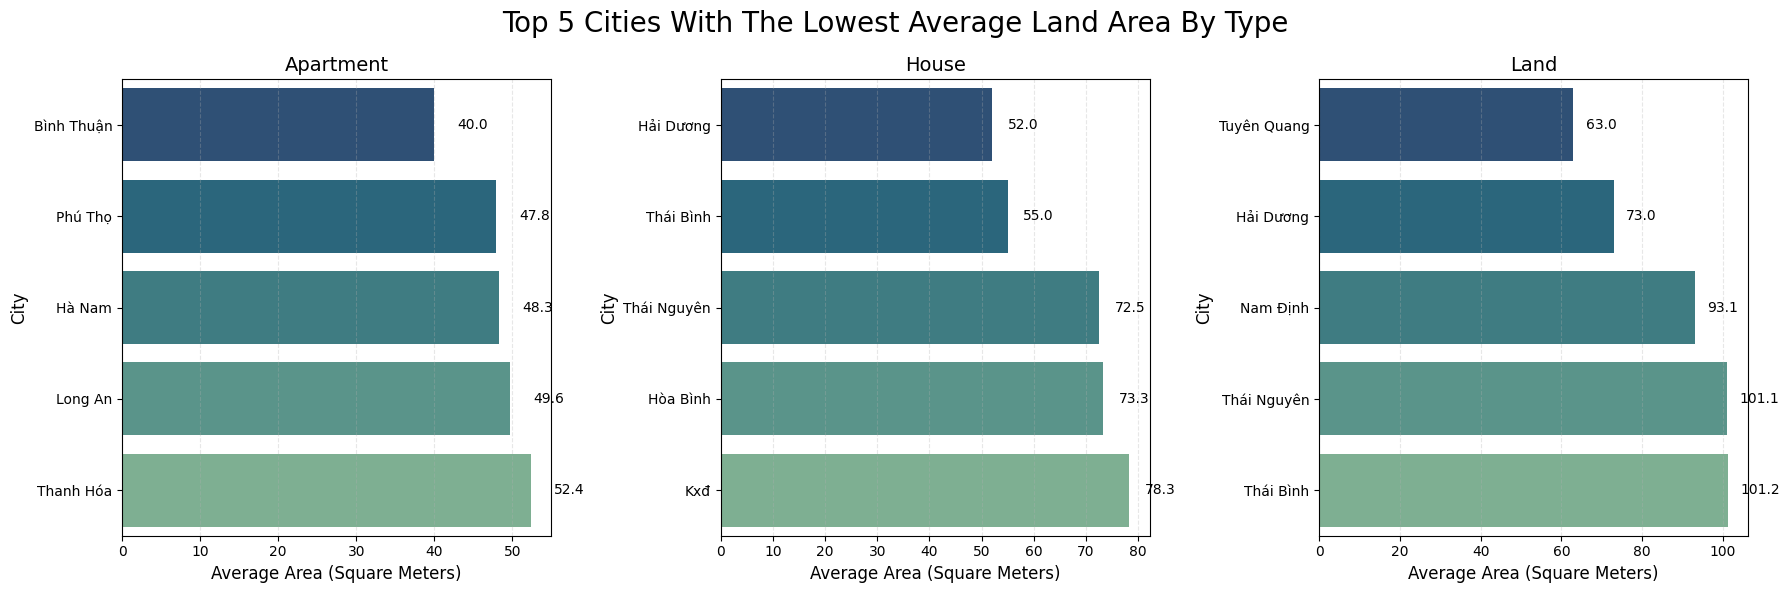

In [ ]:
# Filter data for each type and get top 5 cities with the lowest average land area for each type
top_5_cc = df[df['Loại'] == 'CC'][['Thành phố', 'Diện tích']].groupby('Thành phố').mean().nsmallest(5, 'Diện tích').reset_index()
top_5_n = df[df['Loại'] == 'N'][['Thành phố', 'Diện tích']].groupby('Thành phố').mean().nsmallest(5, 'Diện tích').reset_index()
top_5_d = df[df['Loại'] == 'Đ'][['Thành phố', 'Diện tích']].groupby('Thành phố').mean().nsmallest(5, 'Diện tích').reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Apartment
sns.barplot(
    data=top_5_cc,
    x='Diện tích',
    y=top_5_cc['Thành phố'].str.title(),
    palette='crest_r',
    ax=axes[0]
)
axes[0].set_title('Apartment', fontsize=14)
axes[0].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[0].set_ylabel('City', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for House
sns.barplot(
    data=top_5_n,
    x='Diện tích',
    y=top_5_n['Thành phố'].str.title(),
    palette='crest_r',
    ax=axes[1]
)
axes[1].set_title('House', fontsize=14)
axes[1].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[1].set_ylabel('City', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for Land
sns.barplot(
    data=top_5_d,
    x='Diện tích',
    y=top_5_d['Thành phố'].str.title(),
    palette='crest_r',
    ax=axes[2]
)
axes[2].set_title('Land', fontsize=14)
axes[2].set_xlabel('Average Area (Square Meters)', fontsize=12)
axes[2].set_ylabel('City', fontsize=12)
axes[2].grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels to each bar
for ax, top_5_data in zip(axes, [top_5_cc, top_5_n, top_5_d]):
    for index, value in enumerate(top_5_data['Diện tích']):
        ax.text(
            value + 3,
            index,
            f'{value:.1f}',
            va='center',
            fontsize=10
        )

fig.suptitle('Top 5 Cities With The Lowest Average Land Area By Type', fontsize=20)
plt.tight_layout()
plt.show()


The chart displays **The Top 5 Cities With The Lowest Average Land Area** for three property types: **Apartment**, **House**, and **Land**.

**1. Apartments**
- **Bình Thuận** has the smallest average apartment area, **40.0 m²**, followed by **Phú Thọ** (47.8 m²), **Hà Nam** (48.3 m²), **Long An** (49.6 m²), and **Thanh Hóa** (52.4 m²).
- The sizes are compact, with all cities having apartment areas below **53 m²**, indicating a trend toward smaller, urban-oriented apartment units in these regions.

**2. Houses**
- **Hải Dương** features the smallest average house area at **52.0 m²**, followed by **Thái Bình** (55.0 m²), **Thái Nguyên** (72.5 m²), **Hòa Bình** (73.3 m²), and another city abbreviated as **Kxd** (78.3 m²).
- The average house areas show a wider range compared to apartments, from **52 m²** to **78.3 m²**, reflecting a slightly larger but still modest house size, likely in denser urban or suburban settings.

**3. Land**
- **Tuyên Quang** has the smallest average land area, **63.0 m²**, followed by **Hải Dương** (73.0 m²), **Nam Định** (93.1 m²), **Thái Nguyên** (101.1 m²), and **Thái Bình** (101.2 m²).
- Land areas exhibit higher variability, ranging from **63 m²** to just over **101 m²**, which are relatively small for land plots, suggesting these are primarily urban land parcels.

**Cross-chart Observations**
1. **Compact Urban Development**:
   - Smaller areas for all property types indicate dense urban development or limited land availability in these cities.
   - Apartments have the smallest areas, emphasizing their role as space-efficient housing solutions.

2. **Hải Dương**:
   - Appears in both the **House** and **Land** categories for the smallest areas, highlighting it as a region with limited land resources across multiple property types.

3. **Variability Across Property Types**:
   - Apartments have the smallest range of sizes (40.0–52.4 m²).
   - Houses have slightly larger sizes (52.0–78.3 m²), and land plots are the most variable, reaching up to 101.2 m².

<ipython-input-25-ff84d80fcec4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Giá/m²'] = (temp_df['Mức giá']*1000) / temp_df['Diện tích']
<ipython-input-25-ff84d80fcec4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-ff84d80fcec4>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-25-ff84d80fcec4>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

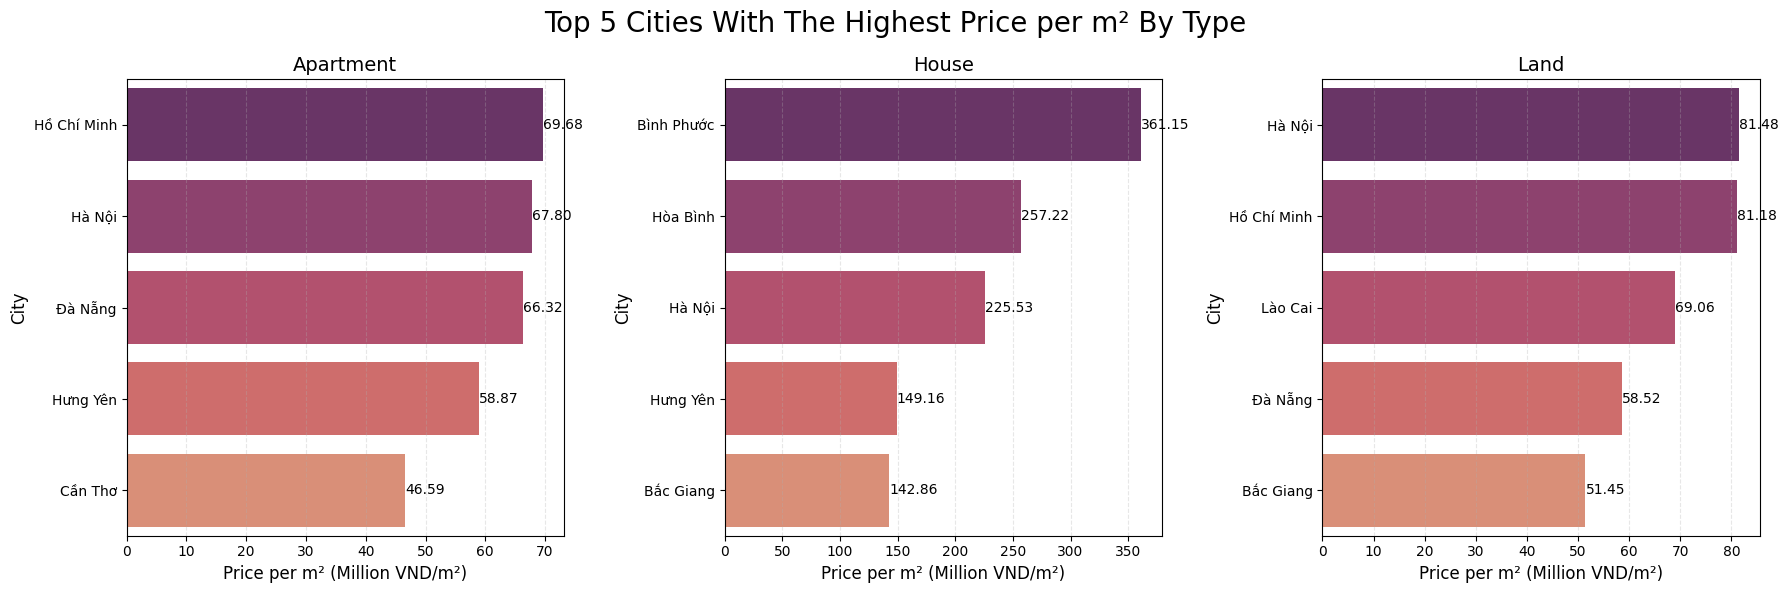

In [ ]:
# Create a temporary DataFrame to perform operations without modifying the original 'df'
temp_df = df[~((df['Loại'] == 'N') & (df['Thành phố'].str.lower() == 'thái nguyên'))]

# Calculate price per square meter in temp_df
temp_df['Giá/m²'] = (temp_df['Mức giá']*1000) / temp_df['Diện tích']

# Filter and calculate the top 5 cities for each type
top_5_cc = temp_df[temp_df['Loại'] == 'CC'][['Thành phố', 'Giá/m²']].groupby('Thành phố').mean().nlargest(5, 'Giá/m²').reset_index()
top_5_n = temp_df[temp_df['Loại'] == 'N'][['Thành phố', 'Giá/m²']].groupby('Thành phố').mean().nlargest(5, 'Giá/m²').reset_index()
top_5_d = temp_df[temp_df['Loại'] == 'Đ'][['Thành phố', 'Giá/m²']].groupby('Thành phố').mean().nlargest(5, 'Giá/m²').reset_index()

# Plotting section
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Apartment
sns.barplot(
    data=top_5_cc,
    x='Giá/m²',
    y=top_5_cc['Thành phố'].str.title(),
    palette='flare_r',
    ax=axes[0]
)
axes[0].set_title('Apartment', fontsize=14)
axes[0].set_xlabel('Price per m² (Million VND/m²)', fontsize=12)
axes[0].set_ylabel('City', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for House
sns.barplot(
    data=top_5_n,
    x='Giá/m²',
    y=top_5_n['Thành phố'].str.title(),
    palette='flare_r',
    ax=axes[1]
)
axes[1].set_title('House', fontsize=14)
axes[1].set_xlabel('Price per m² (Million VND/m²)', fontsize=12)
axes[1].set_ylabel('City', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for Land
sns.barplot(
    data=top_5_d,
    x='Giá/m²',
    y=top_5_d['Thành phố'].str.title(),
    palette='flare_r',
    ax=axes[2]
)
axes[2].set_title('Land', fontsize=14)
axes[2].set_xlabel('Price per m² (Million VND/m²)', fontsize=12)
axes[2].set_ylabel('City', fontsize=12)
axes[2].grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels to each bar
for ax, top_5_data in zip(axes, [top_5_cc, top_5_n, top_5_d]):
    for index, value in enumerate(top_5_data['Giá/m²']):
        ax.text(
            value + 0.001,
            index,
            f'{value:.2f}',
            va='center',
            fontsize=10
        )

fig.suptitle('Top 5 Cities With The Highest Price per m² By Type', fontsize=20)

plt.tight_layout()
plt.show()


The chart presents the **Top 5 Cities with the Highest Price per m²** categorized by property types: **Apartment**, **House**, and **Land**, with prices measured in **million VND per m²**.

**1. Apartments**
- **Hồ Chí Minh** leads with the highest price per m² at **69.68 million VND**, closely followed by **Hà Nội** (67.80 million VND) and **Đà Nẵng** (66.32 million VND).
- **Hưng Yên** and **Cần Thơ** have lower but significant prices, at **58.87 million VND** and **46.59 million VND** respectively.
- **Key Insight**: The dominance of Hồ Chí Minh and Hà Nội reflects their status as major urban and economic hubs, with high demand for apartments in these cities. The relatively lower prices in Hưng Yên and Cần Thơ suggest emerging but less mature apartment markets.

**2. Houses**
- **Bình Phước** significantly outpaces all other cities with a house price of **361.15 million VND per m²**, making it the standout in this category.
- Other high-price locations include **Hòa Bình** (257.22 million VND) and **Hà Nội** (225.53 million VND), with **Hưng Yên** (149.16 million VND) and **Bắc Giang** (142.86 million VND) following.
- **Key Insight**: The extreme price in Bình Phước could reflect premium or niche properties, potentially driven by specific local demand or scarcity. Hòa Bình and Hà Nội demonstrate the influence of high development and proximity to urban centers.

**3. Land**
- **Hà Nội** and **Hồ Chí Minh** lead almost equally in land prices at **81.48 million VND** and **81.18 million VND per m²** respectively, showcasing the premium value of land in Vietnam's top cities.
- **Lào Cai** (69.06 million VND), **Đà Nẵng** (58.52 million VND), and **Bắc Giang** (51.45 million VND) complete the list.
- **Key Insight**: Land prices in Hà Nội and Hồ Chí Minh indicate intense competition for space in these metropolitan areas. The presence of Lào Cai and Bắc Giang points to increasing interest in less saturated but developing regions.

**Cross-chart Observations**
1. **Regional Dominance**: Hồ Chí Minh and Hà Nội dominate all three categories, showcasing their status as central economic hubs.
2. **Outliers**: Bình Phước in the house category stands out with a strikingly higher price, suggesting unique market dynamics or luxury developments.
3. **Emerging Cities**: Cities like Hưng Yên, Cần Thơ, and Bắc Giang indicate growth potential, especially as alternative markets to the major urban areas.
4. **Property Types**: Land prices are more evenly distributed across cities compared to apartments and houses, reflecting broader competition and utility.

<ipython-input-26-e37a4e041f78>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Giá/m²'] = (temp_df['Mức giá'] * 1000) / temp_df['Diện tích']
<ipython-input-26-e37a4e041f78>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-e37a4e041f78>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-26-e37a4e041f78>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

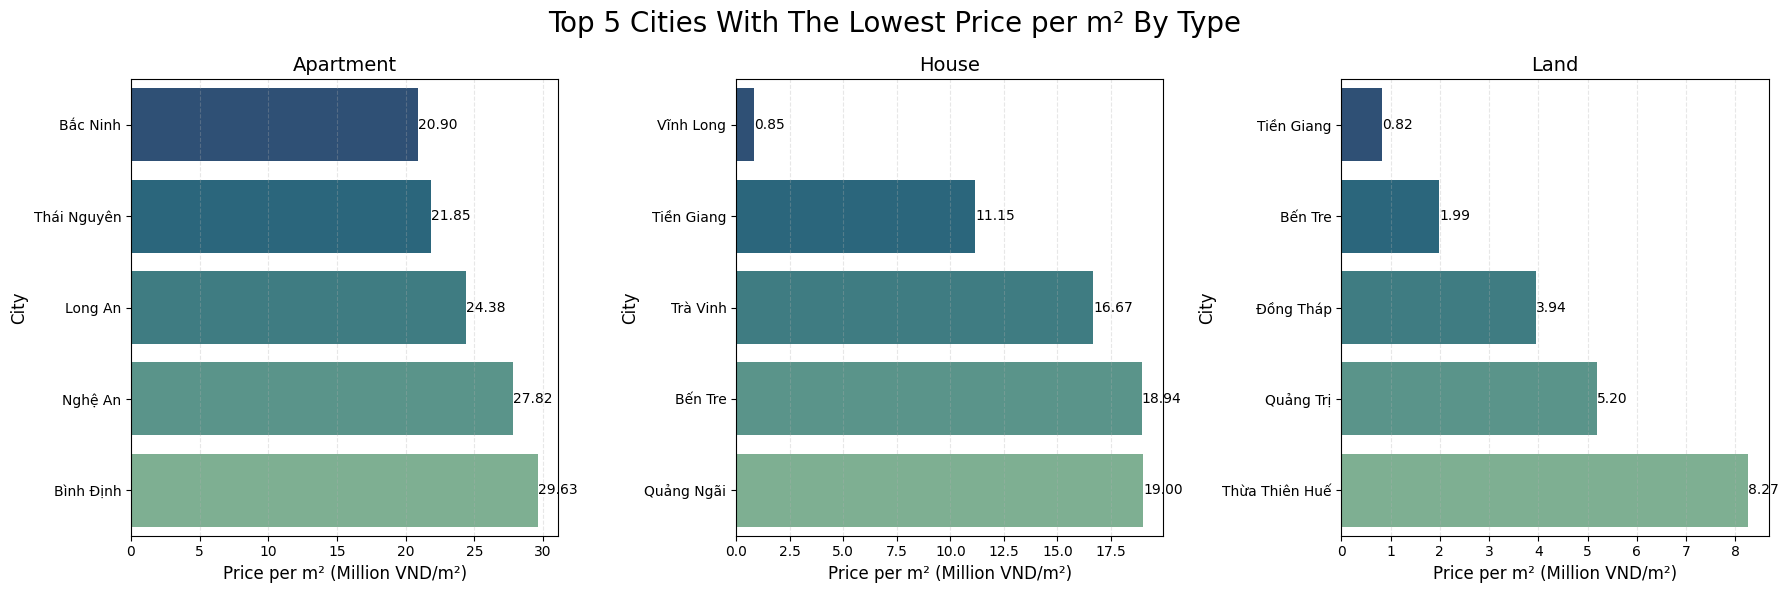

In [ ]:
# Create a temporary DataFrame to perform operations without modifying the original 'df'
temp_df = df[~((df['Loại'] == 'N') & (df['Thành phố'].str.lower() == 'thái nguyên'))]

# Calculate price per square meter in temp_df
temp_df['Giá/m²'] = (temp_df['Mức giá'] * 1000) / temp_df['Diện tích']

# Filter and calculate the top 5 cities with the lowest price per square meter for each type
top_5_cc = temp_df[temp_df['Loại'] == 'CC'][['Thành phố', 'Giá/m²']].groupby('Thành phố').mean().nsmallest(5, 'Giá/m²').reset_index()
top_5_n = temp_df[temp_df['Loại'] == 'N'][['Thành phố', 'Giá/m²']].groupby('Thành phố').mean().nsmallest(5, 'Giá/m²').reset_index()
top_5_d = temp_df[temp_df['Loại'] == 'Đ'][['Thành phố', 'Giá/m²']].groupby('Thành phố').mean().nsmallest(5, 'Giá/m²').reset_index()

# Plotting section
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for Apartment
sns.barplot(
    data=top_5_cc,
    x='Giá/m²',
    y=top_5_cc['Thành phố'].str.title(),
    palette='crest_r',
    ax=axes[0]
)
axes[0].set_title('Apartment', fontsize=14)
axes[0].set_xlabel('Price per m² (Million VND/m²)', fontsize=12)
axes[0].set_ylabel('City', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for House
sns.barplot(
    data=top_5_n,
    x='Giá/m²',
    y=top_5_n['Thành phố'].str.title(),
    palette='crest_r',
    ax=axes[1]
)
axes[1].set_title('House', fontsize=14)
axes[1].set_xlabel('Price per m² (Million VND/m²)', fontsize=12)
axes[1].set_ylabel('City', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.3)

# Plot for Land
sns.barplot(
    data=top_5_d,
    x='Giá/m²',
    y=top_5_d['Thành phố'].str.title(),
    palette='crest_r',
    ax=axes[2]
)
axes[2].set_title('Land', fontsize=14)
axes[2].set_xlabel('Price per m² (Million VND/m²)', fontsize=12)
axes[2].set_ylabel('City', fontsize=12)
axes[2].grid(axis='x', linestyle='--', alpha=0.3)

# Add value labels to each bar
for ax, top_5_data in zip(axes, [top_5_cc, top_5_n, top_5_d]):
    for index, value in enumerate(top_5_data['Giá/m²']):
        ax.text(
            value + 0.001,
            index,
            f'{value:.2f}',
            va='center',
            fontsize=10
        )

fig.suptitle('Top 5 Cities With The Lowest Price per m² By Type', fontsize=20)

plt.tight_layout()
plt.show()


The chart depicts the **Top 5 Cities with the Lowest Price per m²**, categorized by property types: **Apartment**, **House**, and **Land**, with prices expressed in **million VND per m²**.

**1. Apartments**
- **Bắc Ninh** has the lowest price at **20.90 million VND per m²**, followed by **Thái Nguyên** (21.85 million VND) and **Long An** (24.38 million VND).
- **Nghệ An** (27.82 million VND) and **Bình Định** (29.63 million VND) complete the list.
- **Key Insight**: The relatively low apartment prices in these regions indicate lower urbanization levels and less market demand compared to major cities like Hồ Chí Minh or Hà Nội. These areas could be attractive for cost-sensitive buyers or investors focusing on emerging real estate markets.

**2. Houses**
- **Vĩnh Long** stands out with the lowest price for houses at **0.85 million VND per m²**, significantly lower than other cities.
- **Tiền Giang** (11.15 million VND), **Trà Vinh** (16.67 million VND), **Bến Tre** (18.94 million VND), and **Quảng Ngãi** (19.00 million VND) are slightly higher but still among the most affordable for houses.
- **Key Insight**: The extremely low price in Vĩnh Long might reflect rural areas or properties with less development, while other cities like Tiền Giang and Trà Vinh indicate underdeveloped housing markets.

**3. Land**
- **Tiền Giang** has the lowest land price at **0.82 million VND per m²**, followed by **Bến Tre** (1.99 million VND), **Đồng Tháp** (3.94 million VND), **Quảng Trị** (5.20 million VND), and **Thừa Thiên Huế** (8.27 million VND).
- **Key Insight**: These low land prices indicate these regions are less urbanized, with lower demand and less competition. This provides opportunities for long-term investment in land as urbanization expands.

**Cross-chart Observations**
1. **Affordable Regions**: All three categories highlight cities in less urbanized or rural areas, reflecting slower economic and infrastructure development compared to larger cities.
2. **Land as the Cheapest Option**: Land prices are significantly lower than apartment or house prices, making it an attractive option for long-term investments in regions like Tiền Giang and Bến Tre.
3. **Emerging Potential**: Cities like Nghệ An, Bình Định, and Quảng Ngãi may see price increases in the future due to increasing infrastructure development or government investment.
4. **Vĩnh Long Outlier**: The significantly low price for houses in Vĩnh Long could indicate limited development or data anomalies needing further exploration.

# **Outlier Handling**

## **Data Before Handling Outliers**

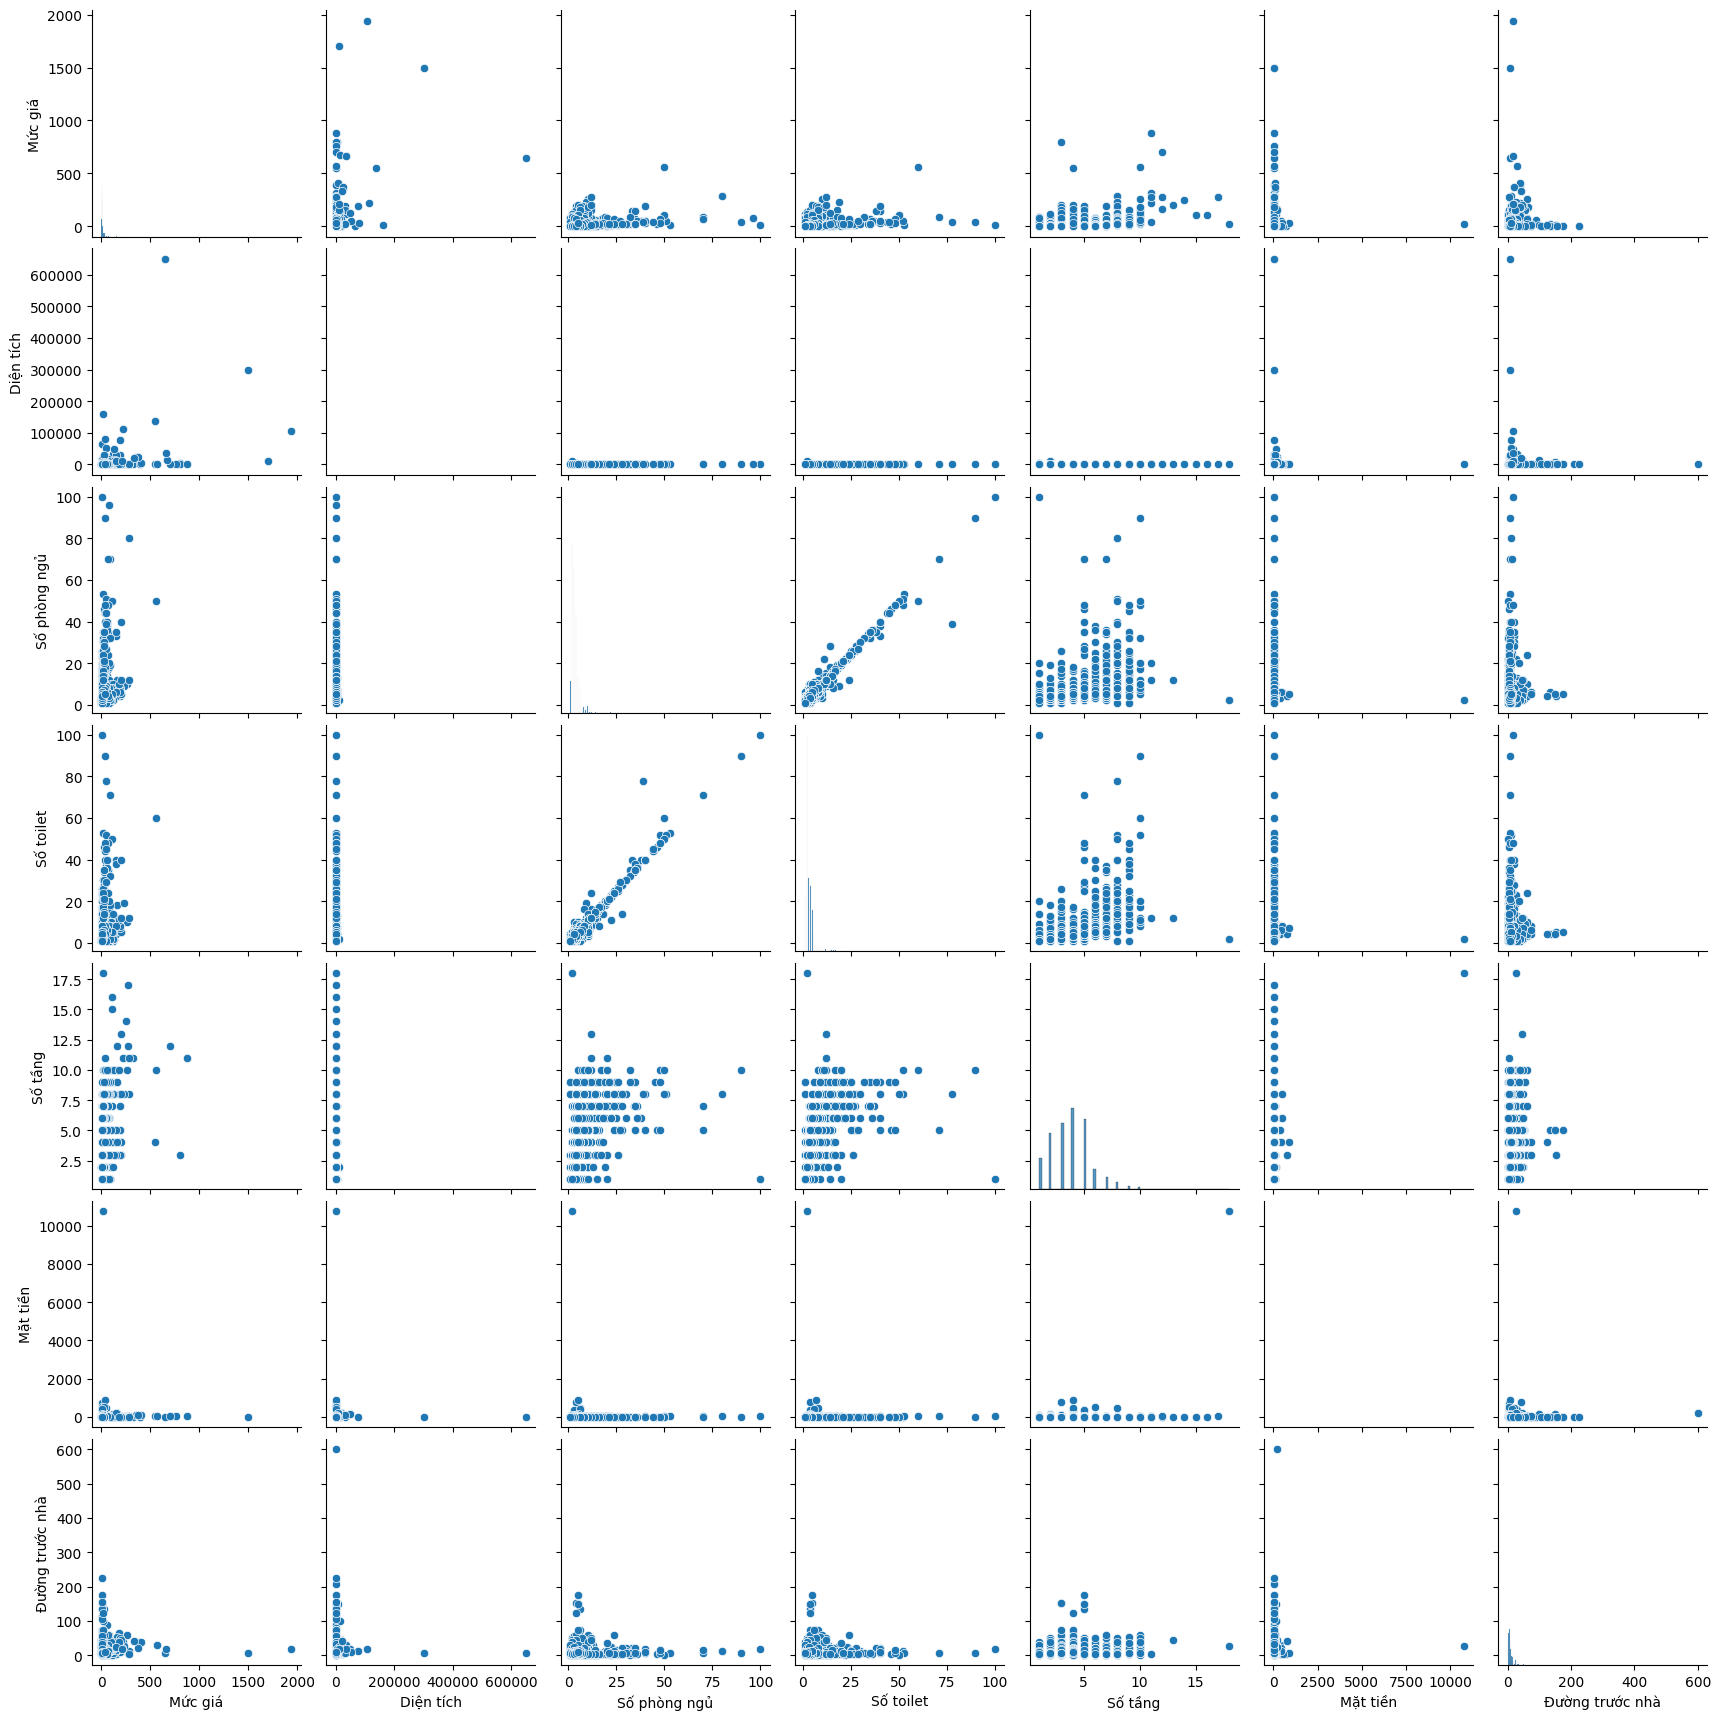

In [ ]:
sns.pairplot(df[['Mức giá', 'Diện tích', 'Số phòng ngủ', 'Số toilet', 'Số tầng', 'Mặt tiền', 'Đường trước nhà']])
plt.show()

The chart is a pair plot, visualizing relationships between multiple numerical variables of the dataset. Each diagonal subplot represents a histogram of a variable, while the off-diagonal subplots display scatter plots showing relationships between pairs of variables.

1. **Price vs. Other Variables:**

    - The scatter plots indicate that price has a non-linear relationship with area. Larger areas generally correspond to higher prices, but the data contains outliers with extremely high prices for small areas.
    - The number of bedrooms and toilets appears loosely correlated with price. More bedrooms or toilets often align with higher prices, though there are noticeable outliers.

2. **Area vs. Other Variables:**

    - Area is strongly correlated with the number of bedrooms and toilets, as larger properties tend to have more rooms. This is visible in the linear trend in their scatter plots.
    - There is less of a discernible relationship between area and the number of floors. Some smaller properties still have several floors.

3. **Relationships Among Bedrooms, Toilets, and Floors:**

    - The number of bedrooms and toilets shows a near-linear correlation, as properties with more bedrooms typically also have more toilets.
    - The number of floors doesn't exhibit a strong relationship with the number of bedrooms or toilets. However, properties with more than 10 floors appear rare, suggesting that most buildings are low-rise or mid-rise.

4. **Weak Correlations**:
   - Variables like `Đường trước nhà` (Road width) and `Mặt tiền` (Frontage) show little to no consistent correlation with others, suggesting these features might not strongly influence other property attributes.

5. **Outlier Detection**

    1. **Outliers in `Mức giá` (Price):**
        - In the scatterplot for `Mức giá` vs. `Diện tích` (Area), some properties show extremely high prices relative to their area. These could represent:
            - Luxury properties in prime locations.
            - Properties with unique features not captured in the dataset (e.g., historical value, premium materials).
        - In other comparisons (e.g., `Mức giá` vs. `Số phòng ngủ`), outliers suggest high prices for properties with a standard or below-average number of bedrooms. This might indicate high demand areas or properties with unique amenities.

    2. **Outliers in `Diện tích` (Area):**
        - The histogram of `Diện tích` shows a right-skewed distribution, with extreme values representing massive properties (e.g., industrial spaces, farmland, or commercial buildings).
        - In the scatterplots, these large-area properties often do not correspond proportionally to `Mức giá`, indicating potential undervaluation or incomplete pricing data.

    3. **Outliers in `Mặt tiền` (Facade) and `Đường trước nhà` (Road Width):**
        - `Mặt tiền` (Facade) has properties with values significantly higher than the majority. These may belong to:
            - Large commercial buildings with wide street-facing areas.
            - Properties in areas where street width is prioritized, such as business districts.
        - `Đường trước nhà` (Road width) also shows extreme values, which might correspond to properties near highways or main roads. However, such features might not necessarily translate to higher property prices.

    4. **Outliers in `Số tầng` (Number of Floors):**
        - Scatterplots reveal properties with unusually high floor counts, likely commercial buildings, office complexes, or mixed-use properties.
        - These often have relatively low correlations with `Diện tích` or `Mức giá`, indicating that tall buildings are not always priced proportionally to their size.

    5. **Impact on Analysis:**
        - **Skewing Averages:** These extreme values could heavily influence mean values, leading to overestimation or underestimation of general trends.
        - **Highlighting Unique Segments:** They may represent distinct property types (e.g., luxury, commercial) that require separate analysis or feature engineering.
        - **Data Cleaning Considerations:** Some outliers could result from data entry errors (e.g., incorrect units, missing decimal points) and might need verification or removal.

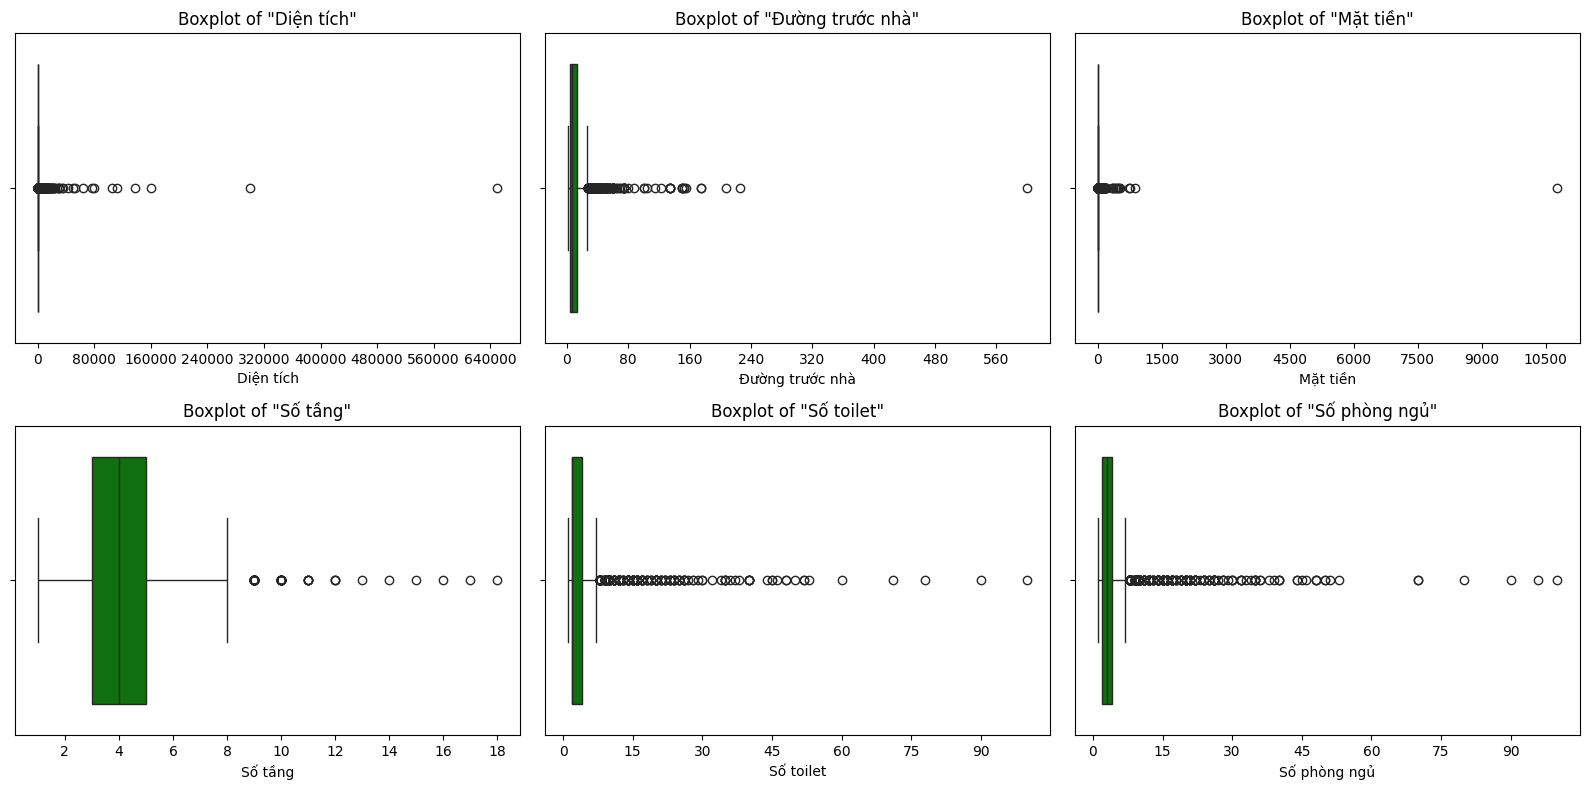

In [ ]:
# Boxplot to detect outliers

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

num_cols = 6
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes = axes.flatten()

for i, col in enumerate(numerical_cols[:num_cols]):
    sns.boxplot(x=df[col], color='green', ax=axes[i])
    axes[i].set_title(f'Boxplot of "{col}"')
    axes[i].set_xlabel(col)

    if col in numerical_cols:
        axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


## **Data After Handling Outliers**

In [ ]:
# Define the conditions to drop rows
drop_condition = (
    ((df['Diện tích'] > 400000) & (df['Mức giá'] < 1000)) |
    ((df['Diện tích'] < 400000) & (df['Mức giá'] > 1000)) |
    ((df['Diện tích'] > 200000) & (df['Mặt tiền'] < 500)) |
    ((df['Diện tích'] < 200000) & (df['Mặt tiền'] > 10000)) |
    ((df['Diện tích'] > 200000) & (df['Đường trước nhà'] < 50)) |
    ((df['Diện tích'] < 200000) & (df['Đường trước nhà'] > 500)) |

    ((df['Số phòng ngủ'] > 60) & (df['Mức giá'] < 500)) |
    ((df['Số phòng ngủ'] < 60) & (df['Mức giá'] > 400)) |
    ((df['Số phòng ngủ'] > 60) & (df['Số toilet'] < 45)) |
    ((df['Số phòng ngủ'] < 10) & (df['Số tầng'] > 15)) |
    ((df['Số phòng ngủ'] < 10) & (df['Mặt tiền'] > 10000)) |
    ((df['Số phòng ngủ'] > 60) & (df['Đường trước nhà'] < 50)) |

    ((df['Số toilet'] > 60) & (df['Mức giá'] < 300)) |
    ((df['Số toilet'] < 70) & (df['Mức giá'] > 300)) |
    ((df['Số toilet'] < 10) & (df['Số tầng'] > 15)) |
    ((df['Số toilet'] > 90) & (df['Số tầng'] < 5)) |
    ((df['Số toilet'] < 10) & (df['Mặt tiền'] > 10000)) |
    ((df['Số toilet'] > 80) & (df['Mặt tiền'] < 100)) |

    ((df['Số tầng'] > 15) & (df['Đường trước nhà'] < 100)) |

    ((df['Mặt tiền'] > 10000) & (df['Mức giá'] < 100)) |
    ((df['Mặt tiền'] < 500) & (df['Mức giá'] > 1000)) |
    ((df['Mặt tiền'] > 10000) & (df['Đường trước nhà'] < 100)) |
    ((df['Mặt tiền'] < 500) & (df['Đường trước nhà'] > 500))
)
df_handled_outlier = df[~drop_condition].copy()

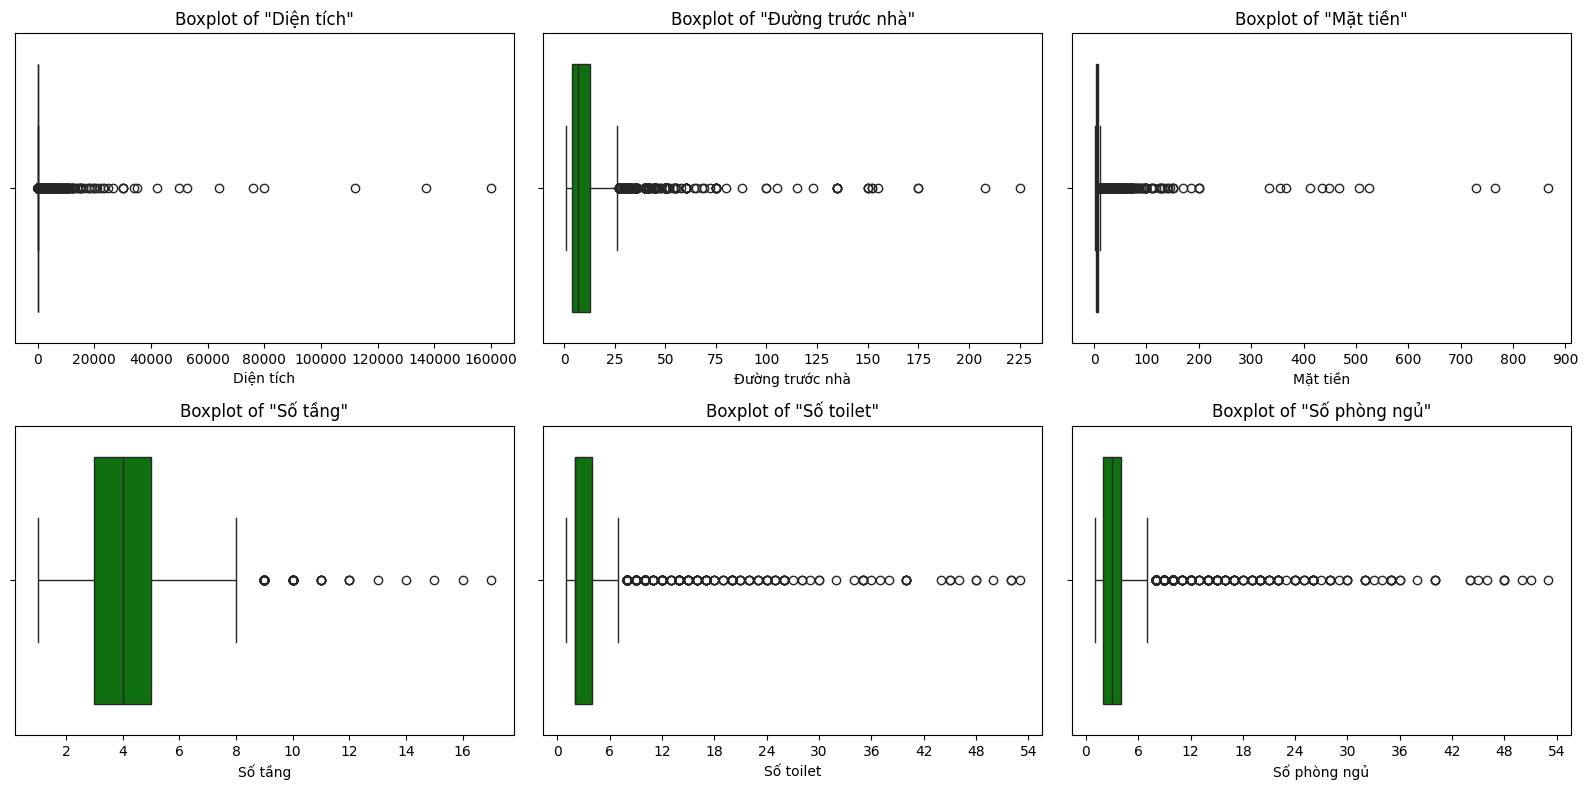

In [ ]:
# Numerical Feature Analysis (Handled)
numerical_cols = df_handled_outlier.select_dtypes(include=['float64', 'int64']).columns

num_cols = 6
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

axes = axes.flatten()

for i, col in enumerate(numerical_cols[:num_cols]):
    sns.boxplot(x=df_handled_outlier[col], color='green', ax=axes[i])
    axes[i].set_title(f'Boxplot of "{col}"')
    axes[i].set_xlabel(col)

    if col in numerical_cols:
        axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


In [ ]:
print(f"Number of houses after handling outliers/Total houses: {df_handled_outlier.shape[0]} / {df.shape[0]}")

Number of houses after handling outliers/Total houses: 13714 / 13728


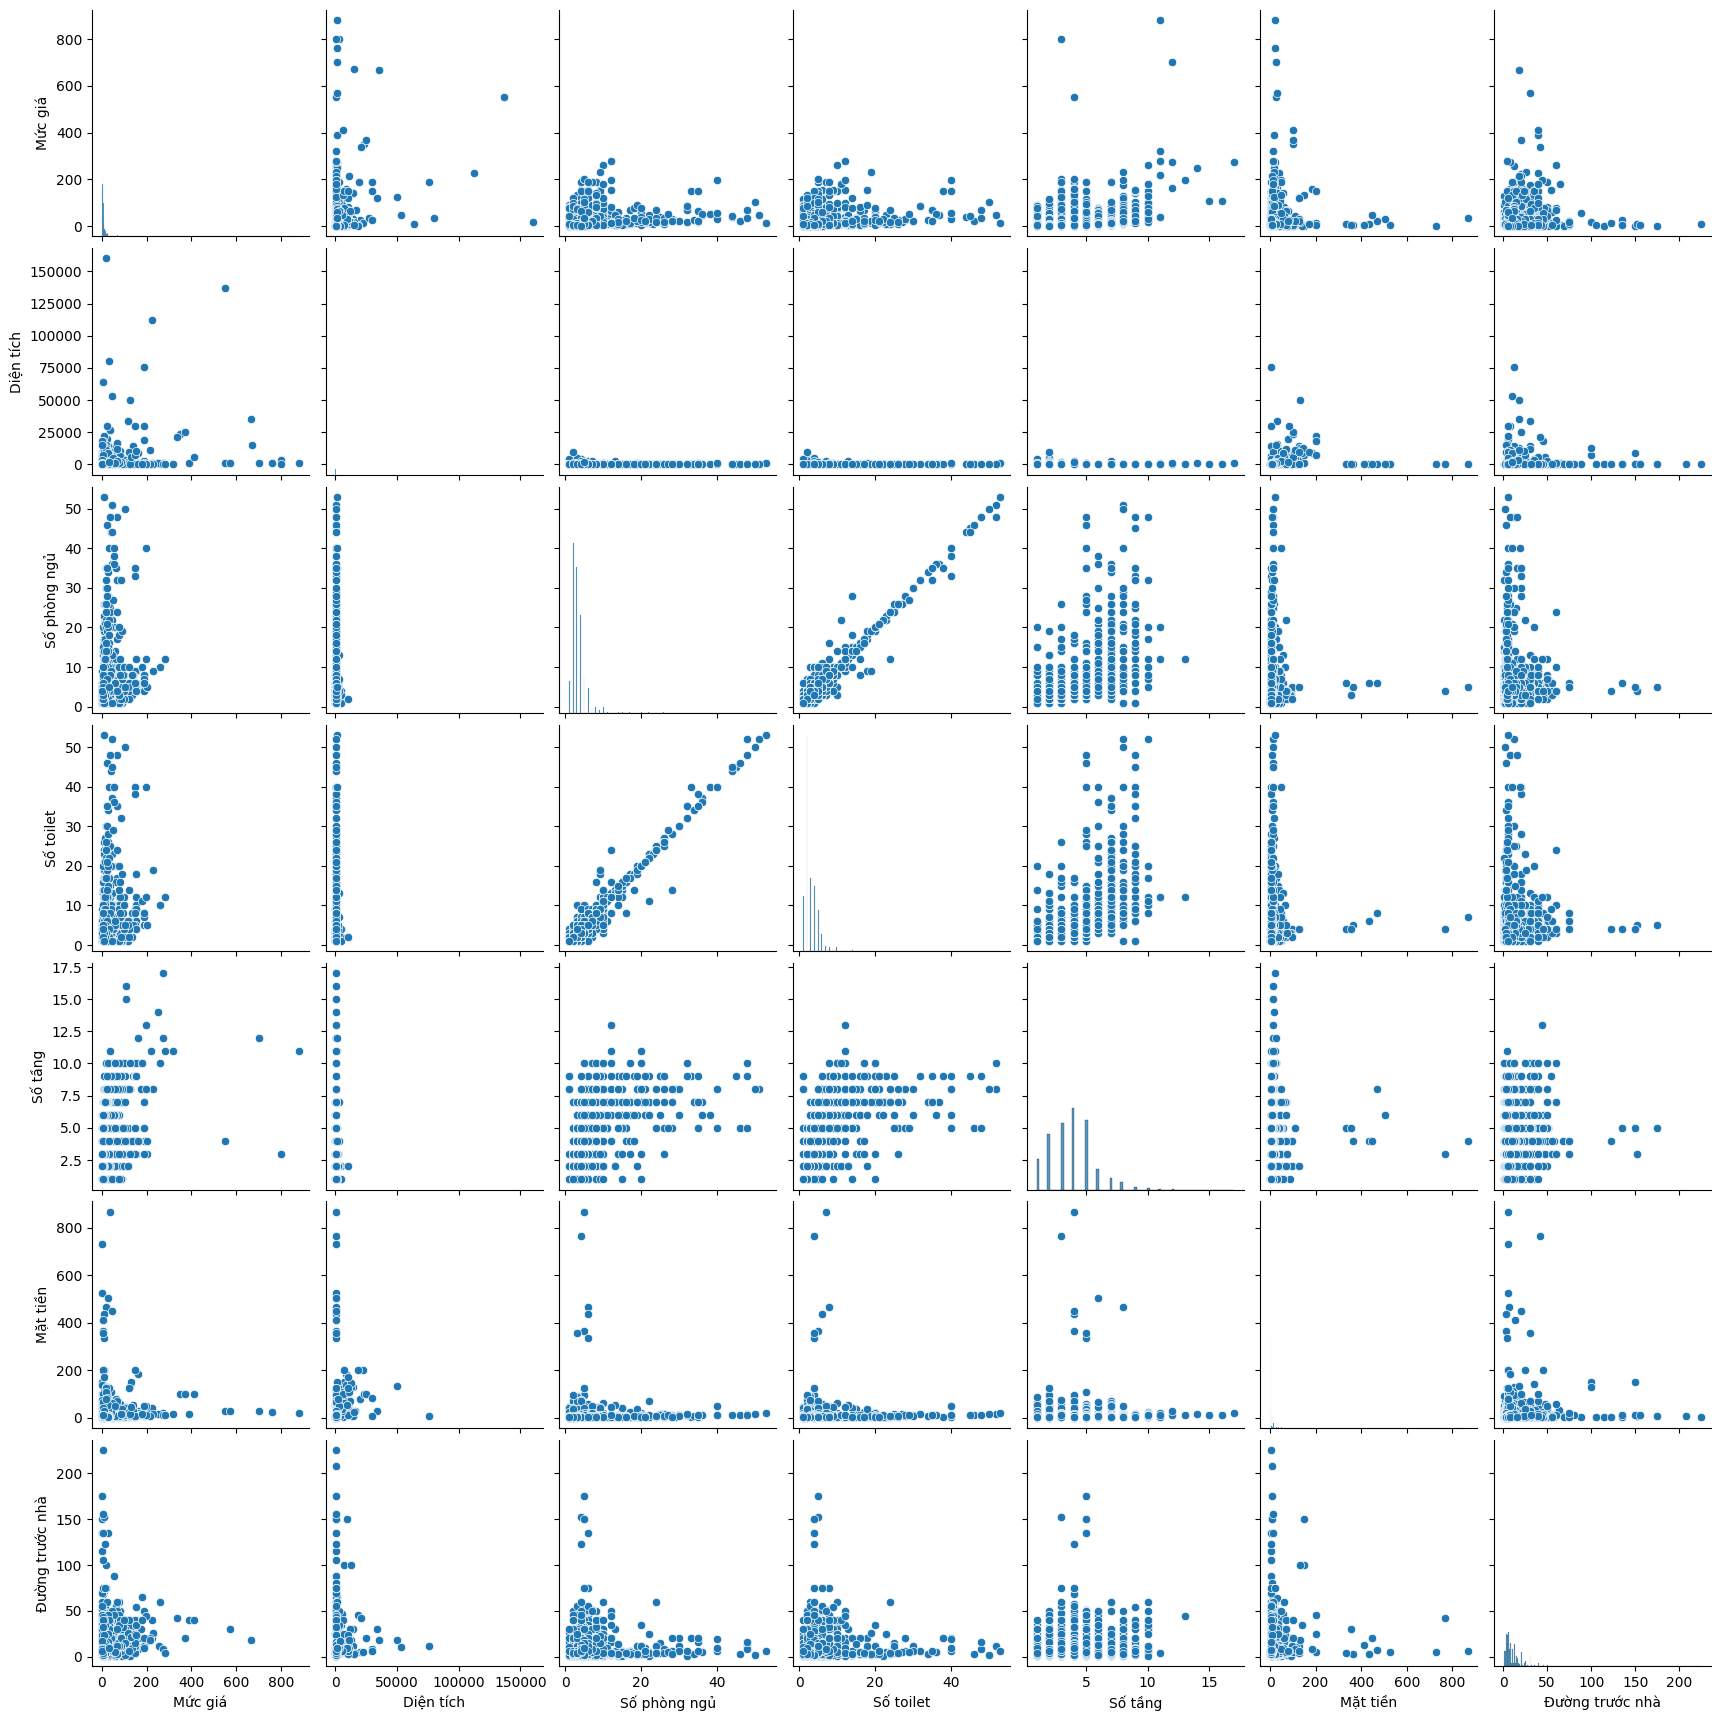

In [ ]:
# Pairplot between numeric features after hadling outliers

sns.pairplot(df_handled_outlier[['Mức giá', 'Diện tích', 'Số phòng ngủ', 'Số toilet', 'Số tầng', 'Mặt tiền', 'Đường trước nhà']])
plt.show()

1. **Outlier Handling:**
   - Compared to the earlier chart, extreme outliers have been effectively mitigated. For example:
     - **`Mức giá` (Price)**: Very high-price outliers are less skewed.
     - **`Diện tích` (Area)**: The extremely large property areas are more constrained, improving clarity.
   - Other variables like `Mặt tiền` and `Đường trước nhà` show reduced extreme values, making the data more interpretable.

2. **Correlation Visibility:**
   - Relationships are clearer due to better outlier treatment. For instance:
     - **`Diện tích` vs `Mức giá`**: The scatterplot now highlights a more consistent positive trend.
     - **`Số tầng` vs `Mức giá`**: The distribution is denser, showing patterns more effectively.

3. **Distribution Improvements:**
   - Histograms on the diagonal now depict more meaningful ranges without extreme skews, especially for variables like `Mức giá` and `Số phòng ngủ`.

4. **Data Representation:**
   - Reduced variability in certain variables (e.g., `Đường trước nhà`) likely results from filtering extreme cases or standardizing categories.